In [ ]:
# importings

!python -m pip install --upgrade pip --quiet

import os
!pip3 install numpy
import numpy as np
!pip3 install pandas
import pandas as pd

!pip3 install scikit-learn
import sklearn

!pip3 install torch torchvision torchaudio
!pip3 install sentence_transformers
from sentence_transformers import SentenceTransformer

!pip3 install cython
!pip3 install hdbscan --no-build-isolation --no-binary :all:

!pip3 install scipy
import hdbscan

!pip3 install umap-learn
import umap

!pip3 install matplotlib
import matplotlib.pyplot as plt

!pip3 install -q openpyxl

!pip3 install opencv-python
import cv2

!pip3 install spacy --quiet
!pip3 install spacy-transformers --quiet
import spacy



In [22]:
home_dir = "/Users/rintrin/codes/ct_gpu_test/"
excel_file_pth = os.path.join(home_dir, "data/TracxnExport-Companies-tagv1-2010-2014.xlsx")
# df = pd.read_excel(excel_file_pth)
xls_all = pd.ExcelFile(excel_file_pth)
print(xls_all.sheet_names)

"""
['Index', 'Companies Covered 1.1', '1.2', '1.3', '1.4', 'Funding Rounds 2.1', '2.2', 'Acquisitions 3.1', 'IPOs 4.1', 'Leaderboard 5.1', 'Soonicorn Club 6.1', 'People 7.1', '7.2', '7.3', '7.4', 'Platform View 8.1', 'Disclaimer']
"""



['Index', 'Companies Covered 1.1', '1.2', '1.3', '1.4', 'Funding Rounds 2.1', '2.2', 'Acquisitions 3.1', 'IPOs 4.1', 'Leaderboard 5.1', 'Soonicorn Club 6.1', 'People 7.1', '7.2', '7.3', '7.4', 'Platform View 8.1', 'Disclaimer']


"\n['Index', 'Companies Covered 1.1', '1.2', '1.3', '1.4', 'Funding Rounds 2.1', '2.2', 'Acquisitions 3.1', 'IPOs 4.1', 'Leaderboard 5.1', 'Soonicorn Club 6.1', 'People 7.1', '7.2', '7.3', '7.4', 'Platform View 8.1', 'Disclaimer']\n"

In [14]:

# dfs = {}
# for sheet_name in ['Companies Covered 1.1', '1.2', '1.3', '1.4']:
#     each_df = pd.read_excel(xls_all, sheet_name=sheet_name)
#     dfs[sheet_name] = each_df.drop(labels=range(5), axis=0)
# dfs["1.2"].head()
sheet_name = 'Companies Covered 1.1'
df_all = pd.read_excel(xls_all, sheet_name=sheet_name)
df = df_all.drop(labels=range(4), axis=0)
# print(df.head())
cols = df.iloc[0]
df = df.rename(columns=cols)
df = df.drop(labels=[4], axis=0)
df = df.reset_index(drop=True)
df.head()

df_overview_all = df.loc[:, ["SNo.","Company Name", "Overview"]]
df_description_all = df.loc[:, ["SNo.","Company Name", "Description"]]

df_overview = df_overview_all["Overview"]
df_description = df_description_all["Description"]
df_description.head()
print([0])

[0]


In [15]:
# from sklearn.datasets import fetch_20newsgroups
# data = fetch_20newsgroups(subset='all')['data']

print(df_description.describe())
# print("null description : ", sum(df_description.isnull().all()))
print("empty description : ", len(list(df_description[df_description==""])))


# for index, row in df_description.iterrows():
#     print("aaa", row)
#     if row == "nan":
#         df_description.loc[index] = df_overview.loc[index]

data_description = list(df_description)
data_overview = list(df_overview)

float_num = 0
for idx, d in enumerate(data_description):
    if type(d) == str:
        pass
    else:
        # print(d)
        # print(type(d))
        if type(data_overview[idx]) == str:
            data_description[idx] = data_overview[idx]
        else:
            data_description[idx] = ""

        float_num+=1
        # print("\n")
print(float_num)


print(data_description[:3])

# print(type(data))
# for i in  range(5):
#     print(data[i])
#     print("\n")

count                                                  2234
unique                                                 2234
top       Provider of microbe-based plant protection pro...
freq                                                      1
Name: Description, dtype: object
empty description :  0
76
['Provider of microbe-based plant protection products. It develops technology to improve yield potential, increase milling quality, and protect plants against environmental stresses. It also offers an online marketplace to buy and sell grains, certified crops, and agrochemicals. It offers microbiome treatment, support to optimize regenerative practices, and grain quality testing services for crop growers.', 'Developer of electric scooters. The company is involved in the design and development of electric scooters that include BLDC motors, fast charging, Li-ion batteries, water and dust resistance, multiple riding modes, mono-shock suspensions, front and rear disc brakes, reverse mode, interac

In [16]:
from scipy.sparse import csr_matrix
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
def plot_tsne_pca(opt, feature_key, data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    # max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)

    print("start pca")
    pca = PCA(n_components=opt.plot.pca_components).fit_transform(
        csr_matrix(data[max_items, :]).todense()
    )
    print("start tsne")
    tsne = TSNE().fit_transform(
        PCA(n_components=opt.plot.tsne_components).fit_transform(
            csr_matrix(data[max_items, :]).todense()
        )
        # PCA(n_components=50).fit_transform(csr_matrix(data[max_items, :]).todense())
    )
    print("start umap")
    umap_output = umap.UMAP(
        n_components=opt.plot.umap_components, random_state=0
    ).fit_transform(csr_matrix(data[max_items, :]).todense())
    print("finish umap")

    idx = np.random.choice(range(pca.shape[0]), size=3000, replace=False)
    # idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i / max_label) for i in label_subset[idx]]

    f, ax = plt.subplots(1, 3, figsize=(20, 6))

    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset, cmap="jet", alpha=0.5)
    ax[0].set_title("PCA Cluster Plot")

    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset, cmap="jet", alpha=0.5)
    ax[1].set_title("TSNE Cluster Plot")

    ax[2].scatter(
        umap_output[idx, 0],
        umap_output[idx, 1],
        c=label_subset,
        cmap="jet",
        alpha=0.5,
    )
    ax[2].set_title("UMAP Cluster Plot")

    buf, size = f.canvas.print_to_buffer()
    img_arr = np.frombuffer(buf, dtype=np.uint8).reshape(size[1], size[0], -1)
    table = cv2.cvtColor(img_arr, cv2.COLOR_RGBA2BGR)

    img_path = os.path.join(opt.debug.home_dir, feature_key, "plot_dim_reduce.jpeg")
    cv2.imwrite(img_path, table)
    print("finish plot")

def clustering_sentence_bert(use_data, pretrained_model, umap_num):
    model = SentenceTransformer(str(pretrained_model))
    if use_data == "Overview":
        embeddings = model.encode(data_overview, show_progress_bar=True)
    else:
        embeddings = model.encode(data_description, show_progress_bar=True)
        
    # embeddings = model.encode(data_description, show_progress_bar=True)

    nn = umap_num
    nc = 5
    umap_embeddings = umap.UMAP(n_neighbors=nn, 
                                n_components=nc, 
                                metric='cosine').fit_transform(embeddings)
    cluster = hdbscan.HDBSCAN(min_cluster_size=5,metric='euclidean',cluster_selection_method='eom').fit(umap_embeddings)


    # Prepare data
    umap_data = umap.UMAP(n_neighbors=nn, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
    result = pd.DataFrame(umap_data, columns=['x', 'y'])
    result['labels'] = cluster.labels_
    print(cluster.labels_)

    # Visualize clusters
    fig, ax = plt.subplots(figsize=(20, 10))
    outliers = result.loc[result.labels == -1, :]
    clustered = result.loc[result.labels != -1, :]
    size = 5.0
    plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=size)
    # plt.scatter(clustered.x, clustered.y, c= s=0.05, cmap='hsv_r')
    plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=size, cmap='hsv_r')
    plt.colorbar()


    buf, size = fig.canvas.print_to_buffer()
    img_arr = np.frombuffer(buf, dtype=np.uint8).reshape(size[1], size[0], -1)
    table = cv2.cvtColor(img_arr, cv2.COLOR_RGBA2BGR)
    img_path = os.path.join(home_dir, f"data/cluster_imgs/{use_data}_{pretrained_model}_umap_nn{nn}_nc{nc}.png")
    if os.path.exists(img_path):
        pass
    else:
        cv2.imwrite(img_path, table)
    
    # # 次元削減する
    # mapper = manifold.TSNE(random_state=0)
    # embedding = mapper.fit_transform(X)

    # # 結果を二次元でプロットする
    # embedding_x = embedding[:, 0]
    # embedding_y = embedding[:, 1]
    # for n in np.unique(y):
    #     plt.scatter(embedding_x[y == n],
    #                 embedding_y[y == n],
    #                 label=n)

    # # グラフを表示する
    # plt.grid()
    # plt.legend()
    # plt.show()

    # def make_table(self, fig, x_list, y_dic, frame_num):
    #     ax = fig.add_subplot(1, 1, 1)
    #     for clr in self.use_color:
    #         ax.plot(x_list, y_dic[clr], color=self.plot_color_dic[clr], label=clr)
    #         ax.scatter(frame_num, y_dic[clr][-1], c=self.plot_color_dic[clr])
    #     ax.legend(loc=0)
    #     buf, size = fig.canvas.print_to_buffer()
    #     # print('size is : ',size)
    #     img_arr = np.frombuffer(buf, dtype=np.uint8).reshape(size[1], size[0], -1)
    #     table = cv2.cvtColor(img_arr, cv2.COLOR_RGBA2BGR)
    #     return table

Overview_all-mpnet-base-v2_5


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[36 96 -1 ... 16  1 91]
Overview_all-mpnet-base-v2_10


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[58 64 30 ... 12  0 50]
Overview_all-mpnet-base-v2_20


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[40 56 23 ... 45  0 51]
Overview_all-mpnet-base-v2_30


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[30 45 41 ... 23  0 57]
Overview_all-mpnet-base-v2_40


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[52 32 29 ... 16  0 -1]
Overview_all-mpnet-base-v2_50


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[41 60 54 ... 13  0 42]
Overview_all-mpnet-base-v2_60


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[28 46 51 ... 22  0 43]
Overview_all-mpnet-base-v2_70


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[33 44 43 ... 11  0 48]
Overview_all-mpnet-base-v2_80


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[1 1 1 ... 1 0 1]
Overview_all-mpnet-base-v2_90


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[1 1 1 ... 1 0 1]
Overview_all-mpnet-base-v2_100


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[1 1 1 ... 1 0 1]
Overview_distilbert-base-nli-mean-tokens_5


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[ -1  19  32 ... 104   8  56]
Overview_distilbert-base-nli-mean-tokens_10


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[-1 60 22 ... 62  6 88]
Overview_distilbert-base-nli-mean-tokens_20


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[-1 32 26 ... -1  0 55]
Overview_distilbert-base-nli-mean-tokens_30


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[-1 14 15 ... -1  0 29]
Overview_distilbert-base-nli-mean-tokens_40


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[28 16  5 ... 50  0 44]
Overview_distilbert-base-nli-mean-tokens_50


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[-1 26 29 ... -1  0 47]
Overview_distilbert-base-nli-mean-tokens_60


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[-1  9  7 ... -1  0 20]
Overview_distilbert-base-nli-mean-tokens_70


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[56 16 10 ... -1  0 20]
Overview_distilbert-base-nli-mean-tokens_80


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[-1 12 18 ... -1  0 23]
Overview_distilbert-base-nli-mean-tokens_90


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[-1 11  8 ... -1  0 28]
Overview_distilbert-base-nli-mean-tokens_100


/var/folders/rv/9j6lm3915kq3y25xcmm_m4x80000gn/T/ipykernel_50600/3436038530.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(20, 10))


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[-1 37 12 ... -1  0 38]
Description_all-mpnet-base-v2_5


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[53 77 67 ... 12  1 55]
Description_all-mpnet-base-v2_10


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[44 50 47 ... 59  0 53]
Description_all-mpnet-base-v2_20


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[26 -1 32 ... 54  0 42]
Description_all-mpnet-base-v2_30


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[42 23 26 ... 11  0 23]
Description_all-mpnet-base-v2_40


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[1 1 1 ... 1 0 1]
Description_all-mpnet-base-v2_50


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[31 24 14 ... 49  0 24]
Description_all-mpnet-base-v2_60


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[1 1 1 ... 1 0 1]
Description_all-mpnet-base-v2_70


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[1 1 1 ... 1 0 1]
Description_all-mpnet-base-v2_80


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[1 1 1 ... 1 0 1]
Description_all-mpnet-base-v2_90


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[1 1 1 ... 1 0 1]
Description_all-mpnet-base-v2_100


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[1 1 1 ... 1 0 1]
Description_distilbert-base-nli-mean-tokens_5


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[39 81 78 ... -1  0 80]
Description_distilbert-base-nli-mean-tokens_10


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[-1 71 37 ... -1  0 52]
Description_distilbert-base-nli-mean-tokens_20


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[1 1 1 ... 1 0 1]
Description_distilbert-base-nli-mean-tokens_30


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[1 1 1 ... 1 0 1]
Description_distilbert-base-nli-mean-tokens_40


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[1 1 1 ... 1 0 1]
Description_distilbert-base-nli-mean-tokens_50


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[1 1 1 ... 1 0 1]
Description_distilbert-base-nli-mean-tokens_60


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[1 1 1 ... 1 0 1]
Description_distilbert-base-nli-mean-tokens_70


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[1 1 1 ... 1 0 1]
Description_distilbert-base-nli-mean-tokens_80


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[1 1 1 ... 1 0 1]
Description_distilbert-base-nli-mean-tokens_90


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[1 1 1 ... 1 0 1]
Description_distilbert-base-nli-mean-tokens_100


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

[1 1 1 ... 1 0 1]


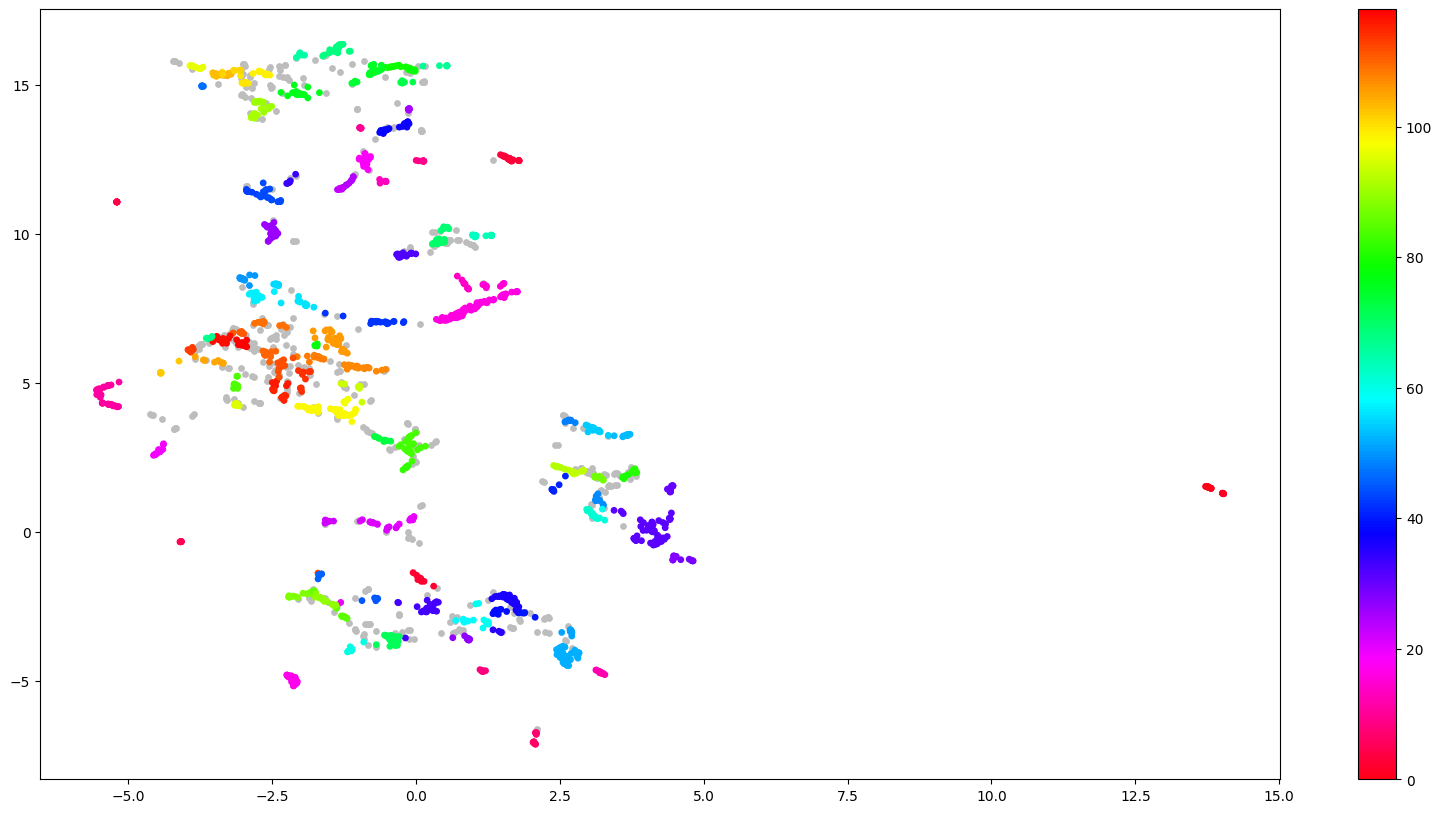

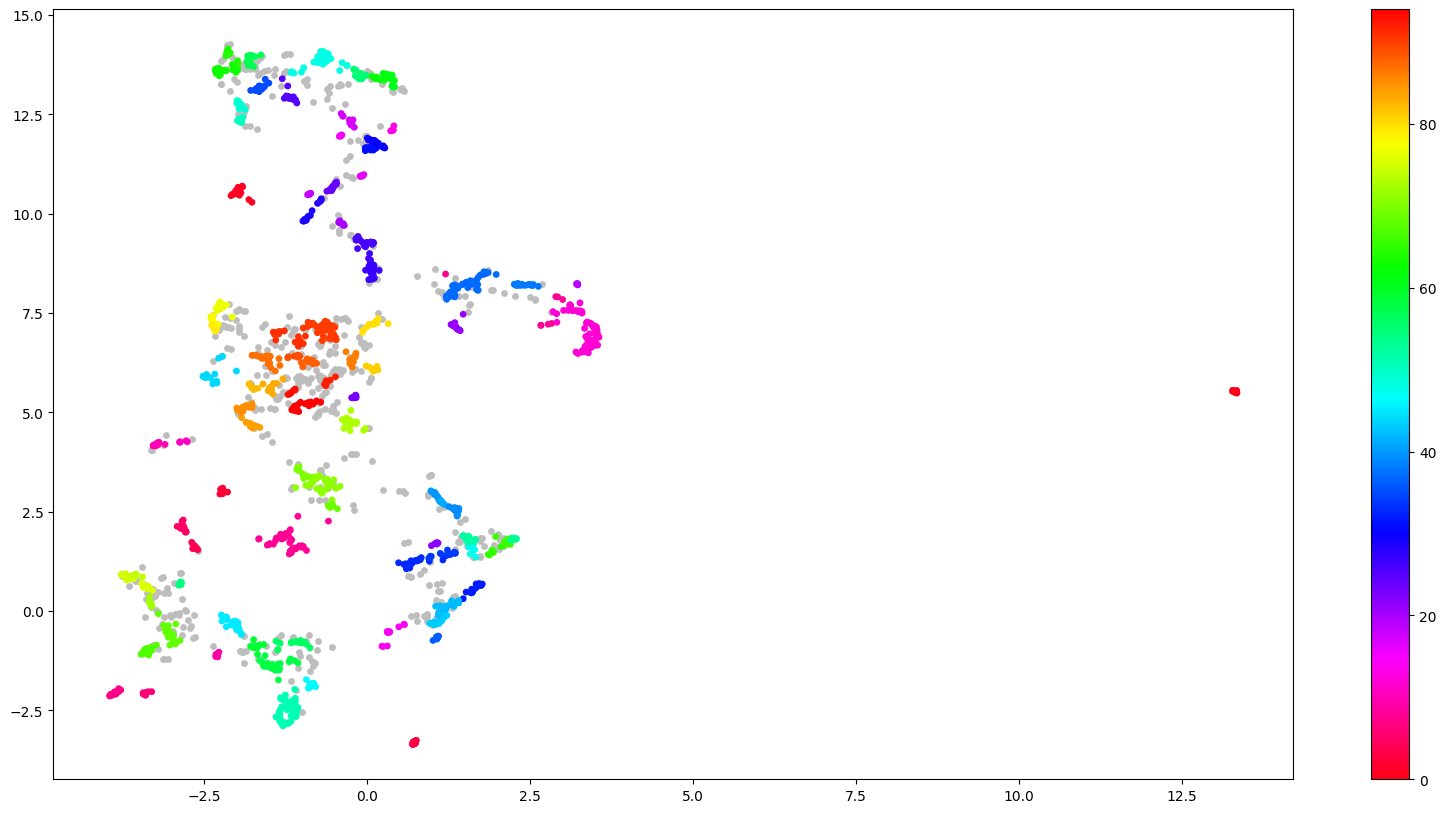

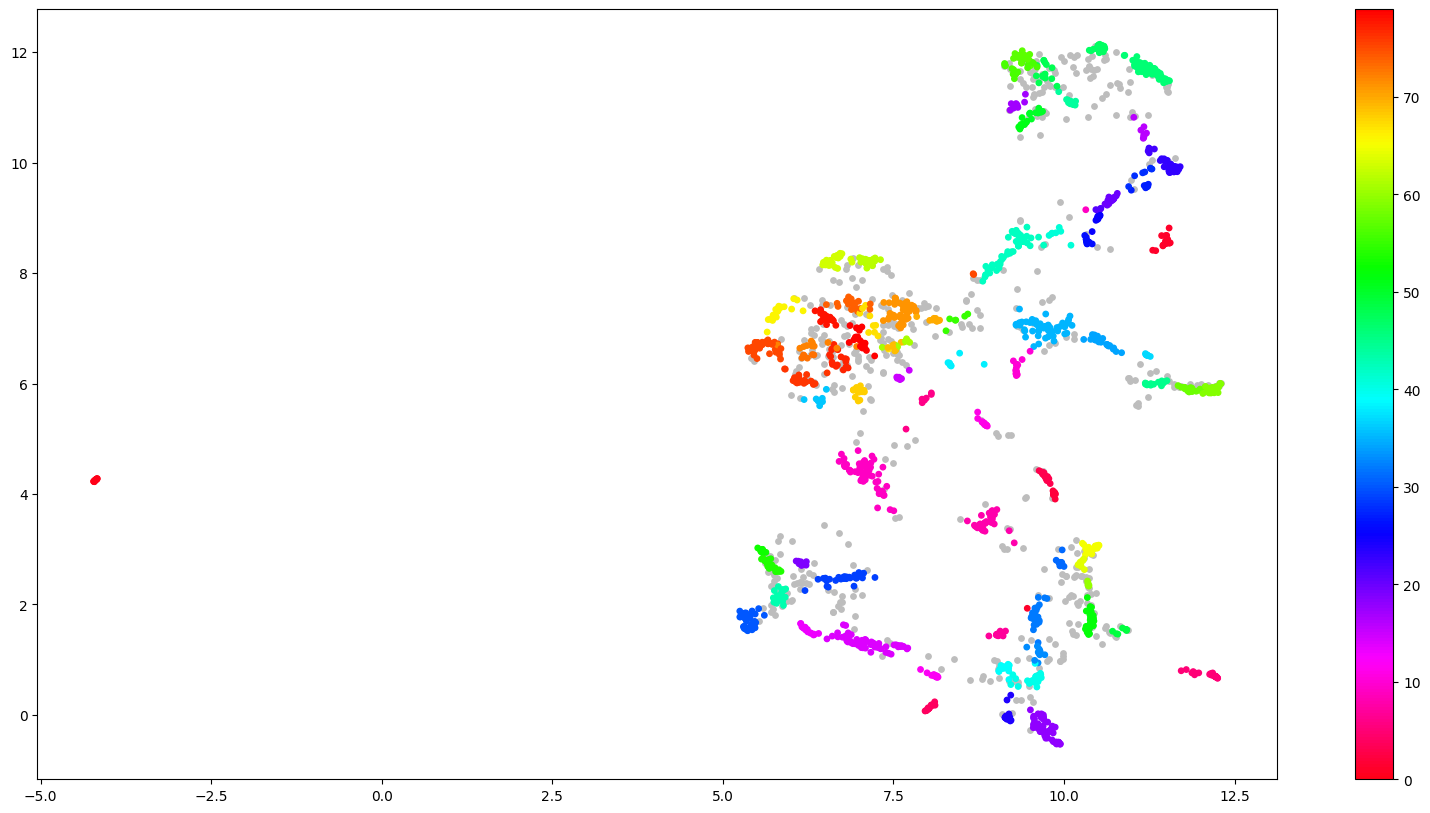

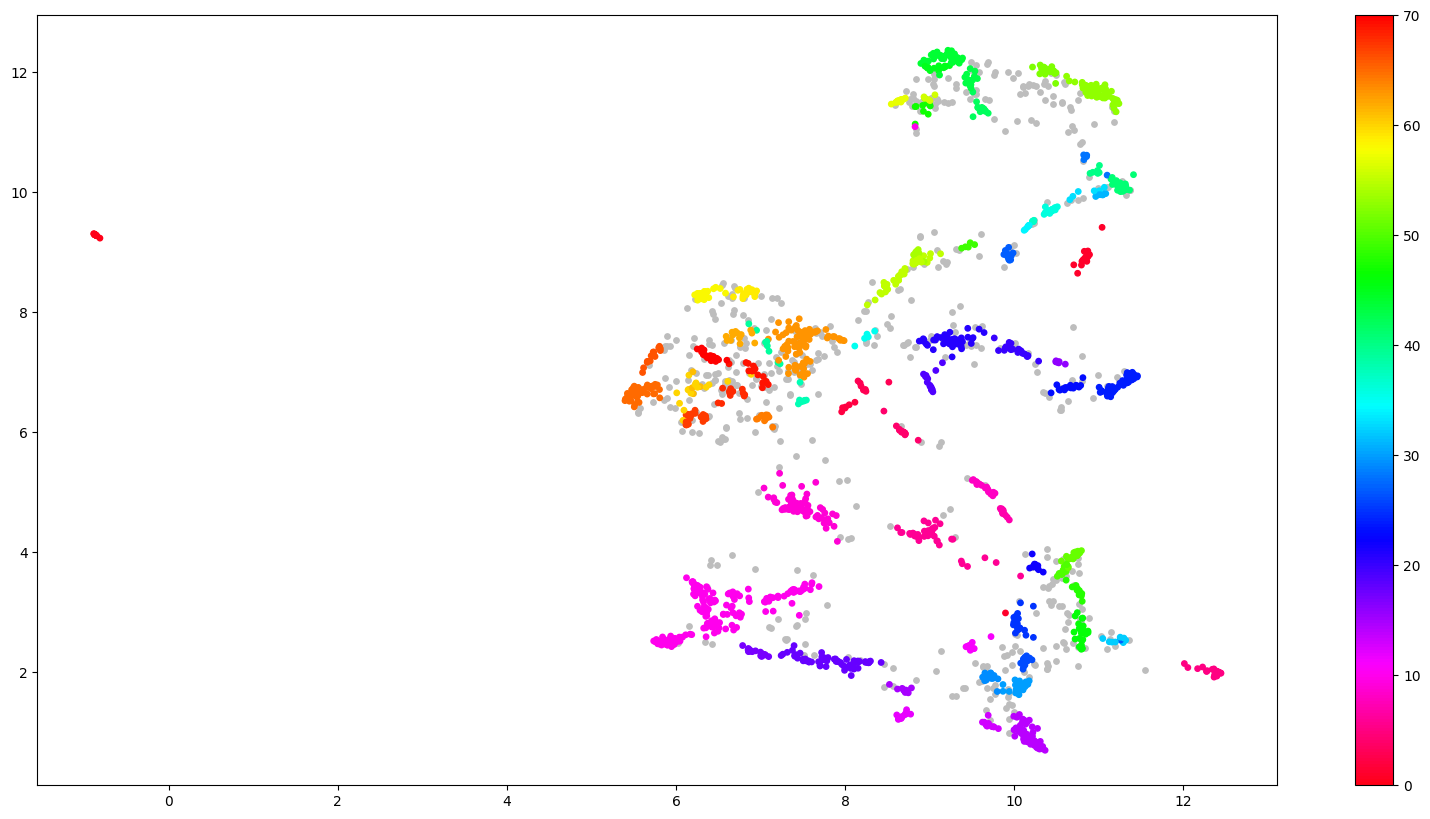

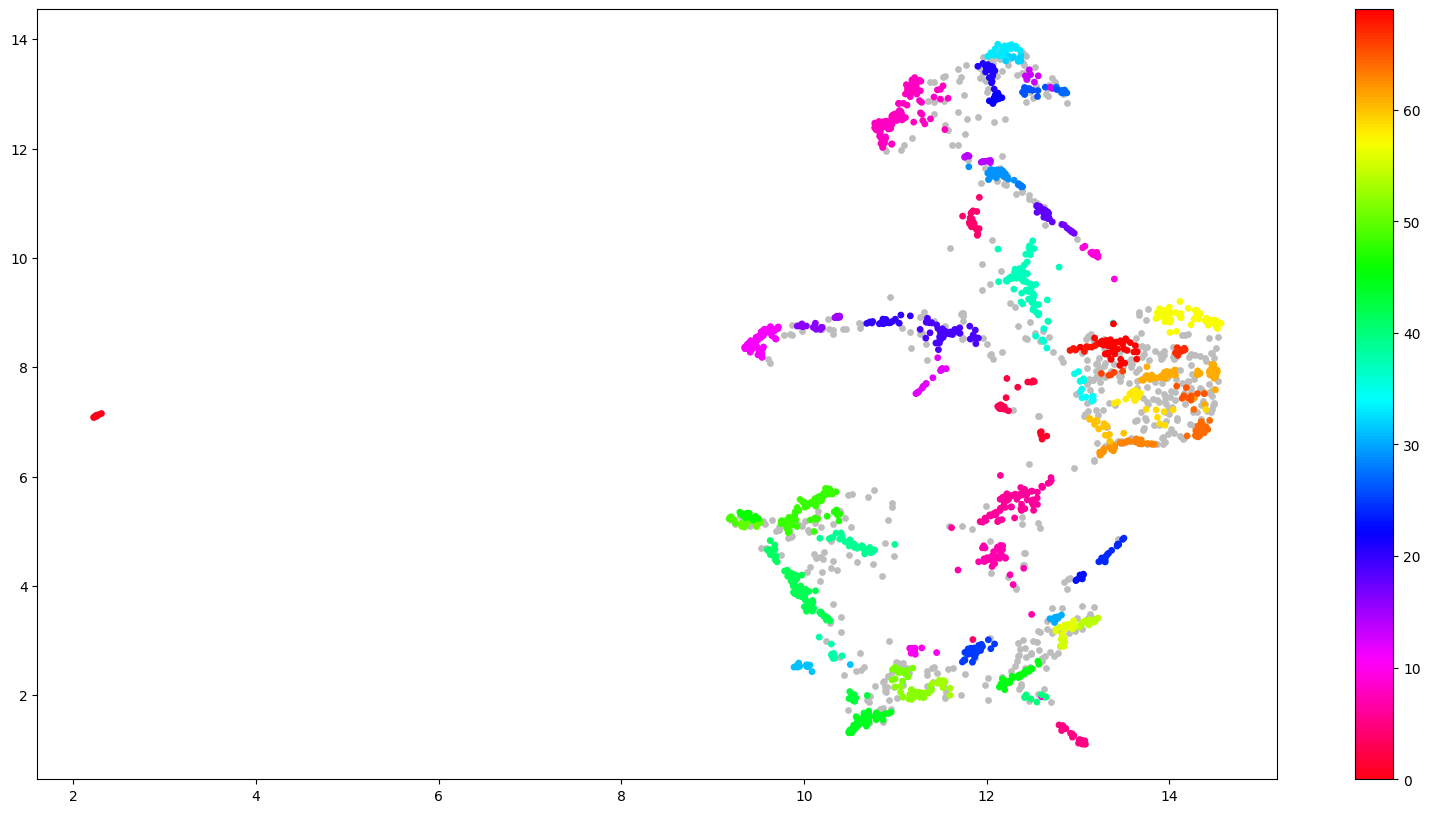

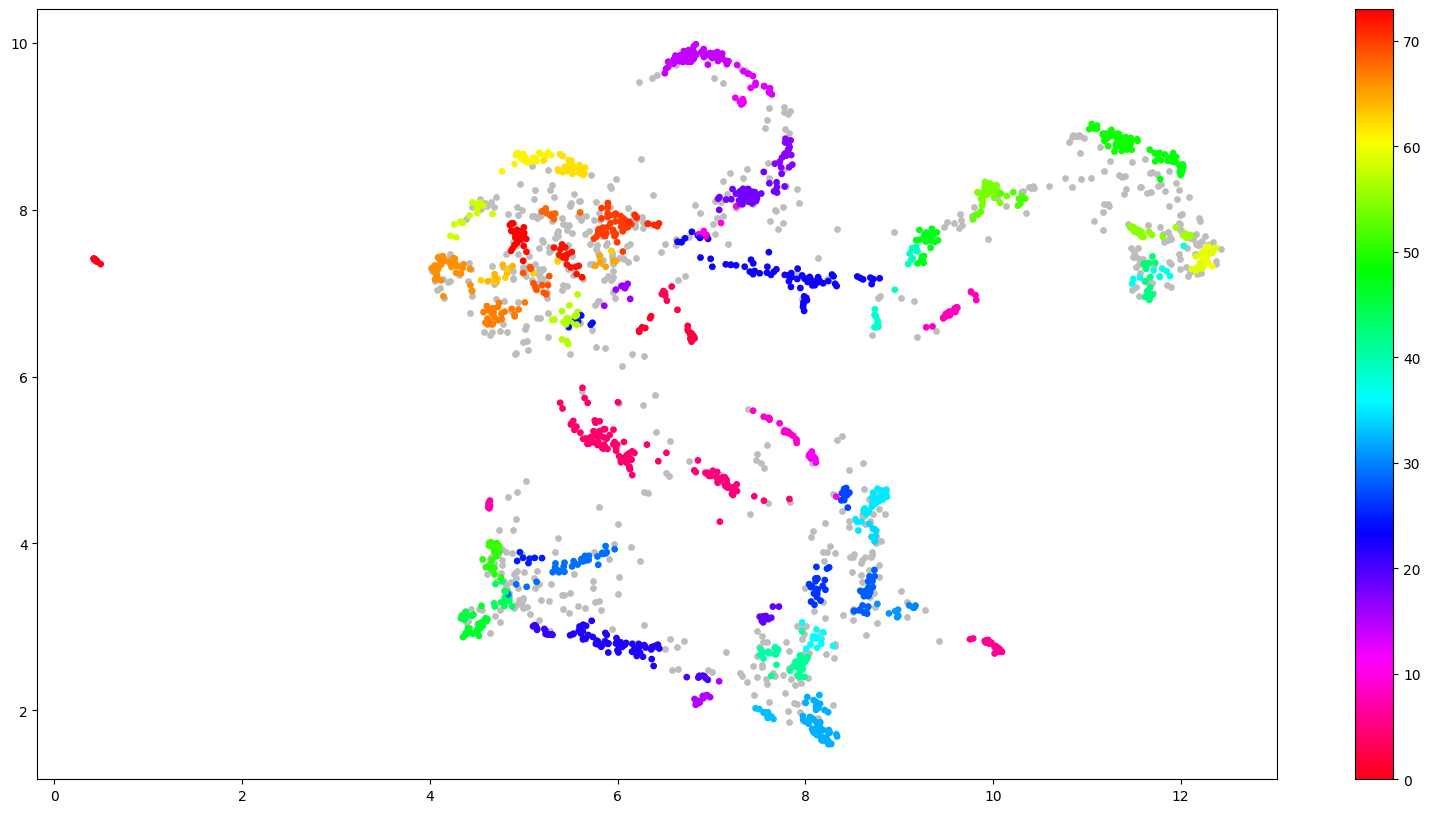

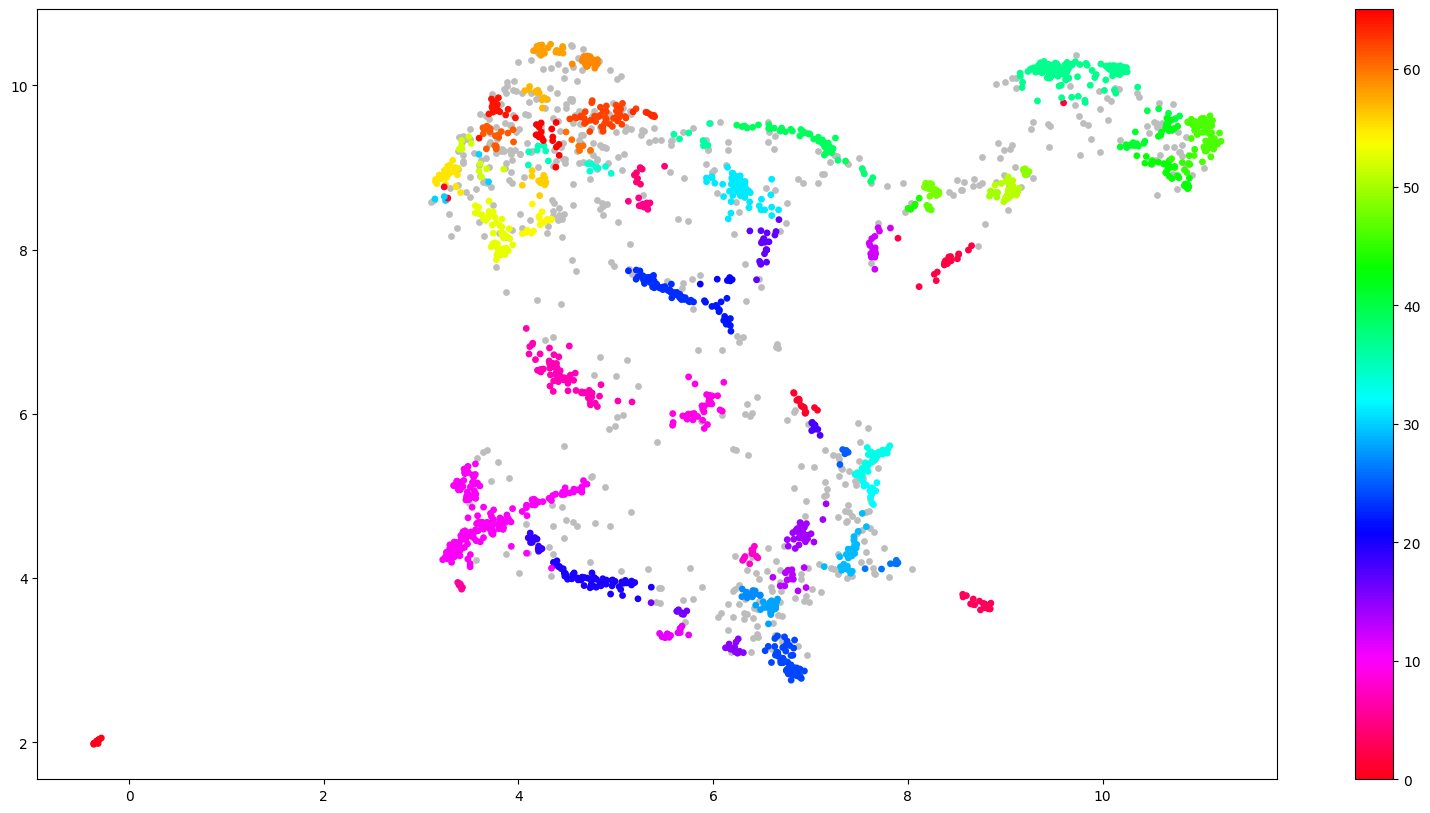

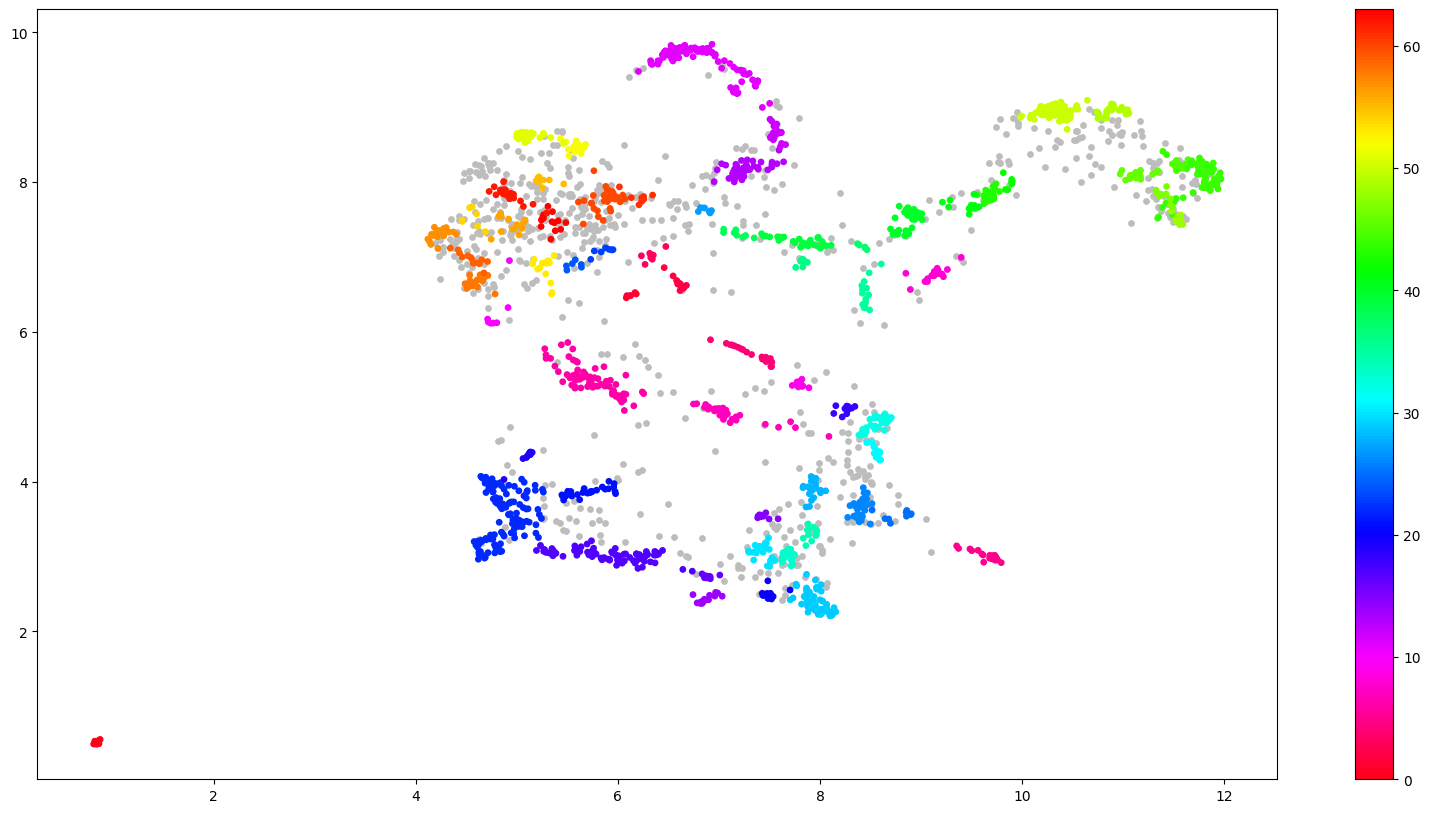

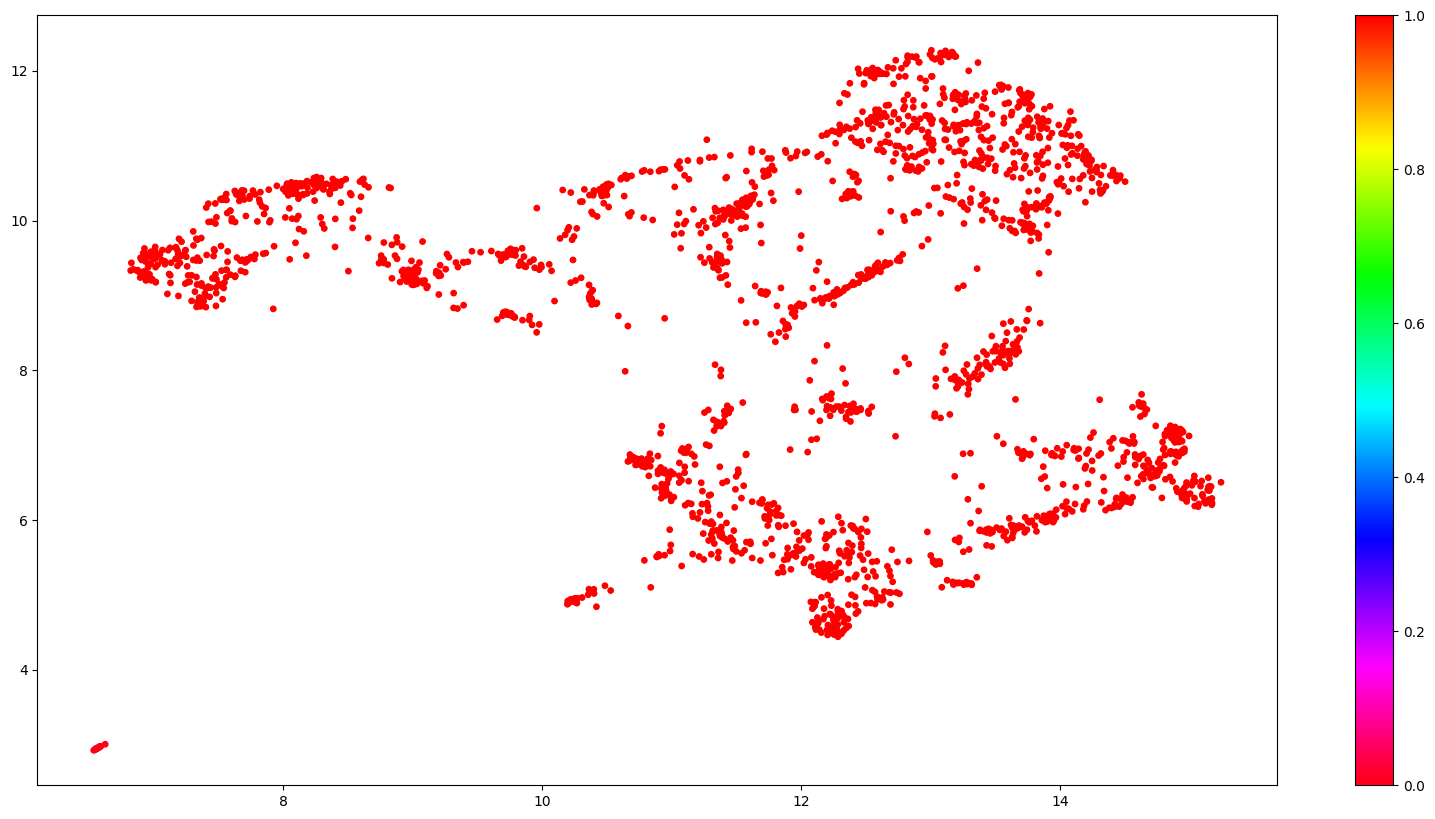

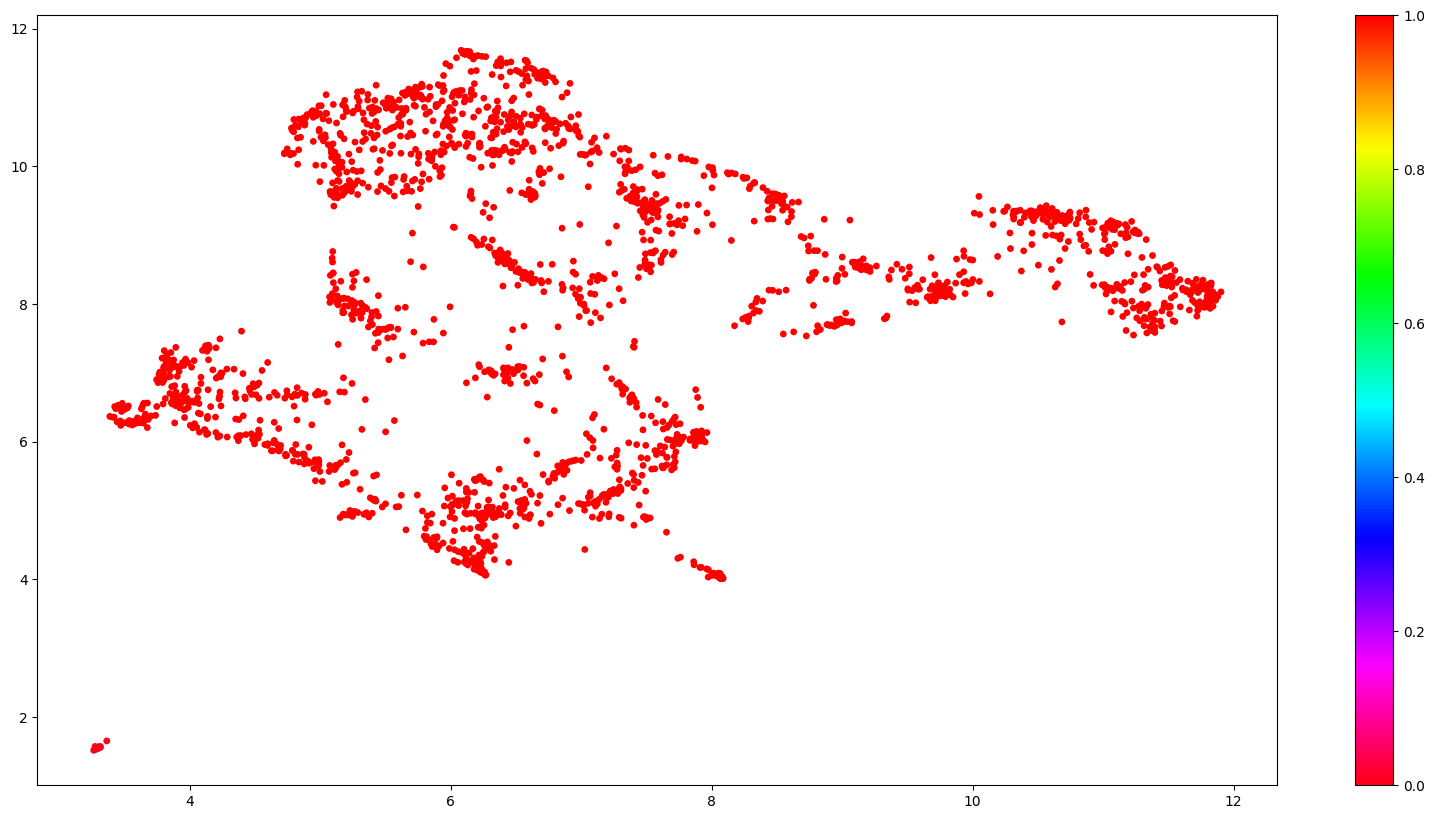

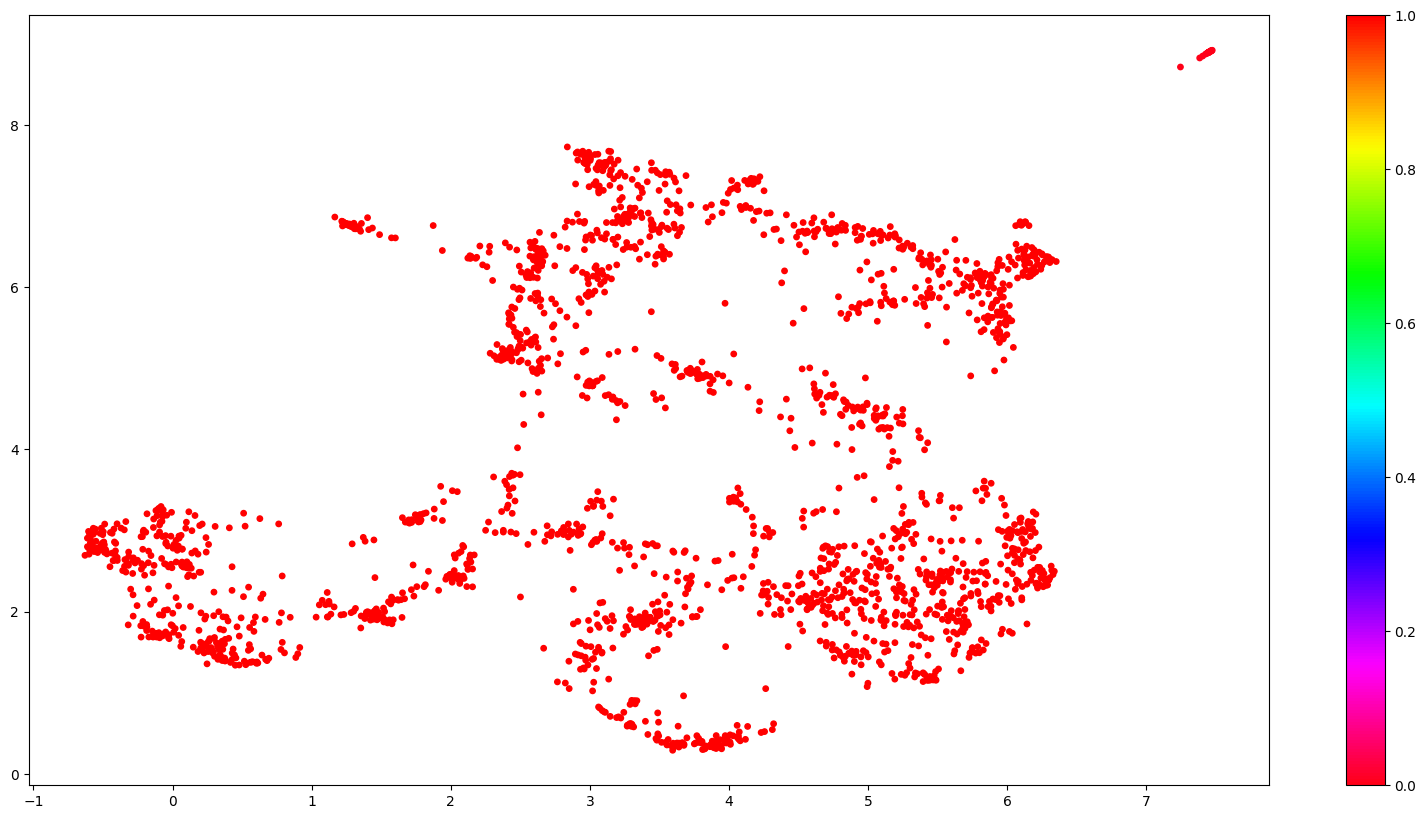

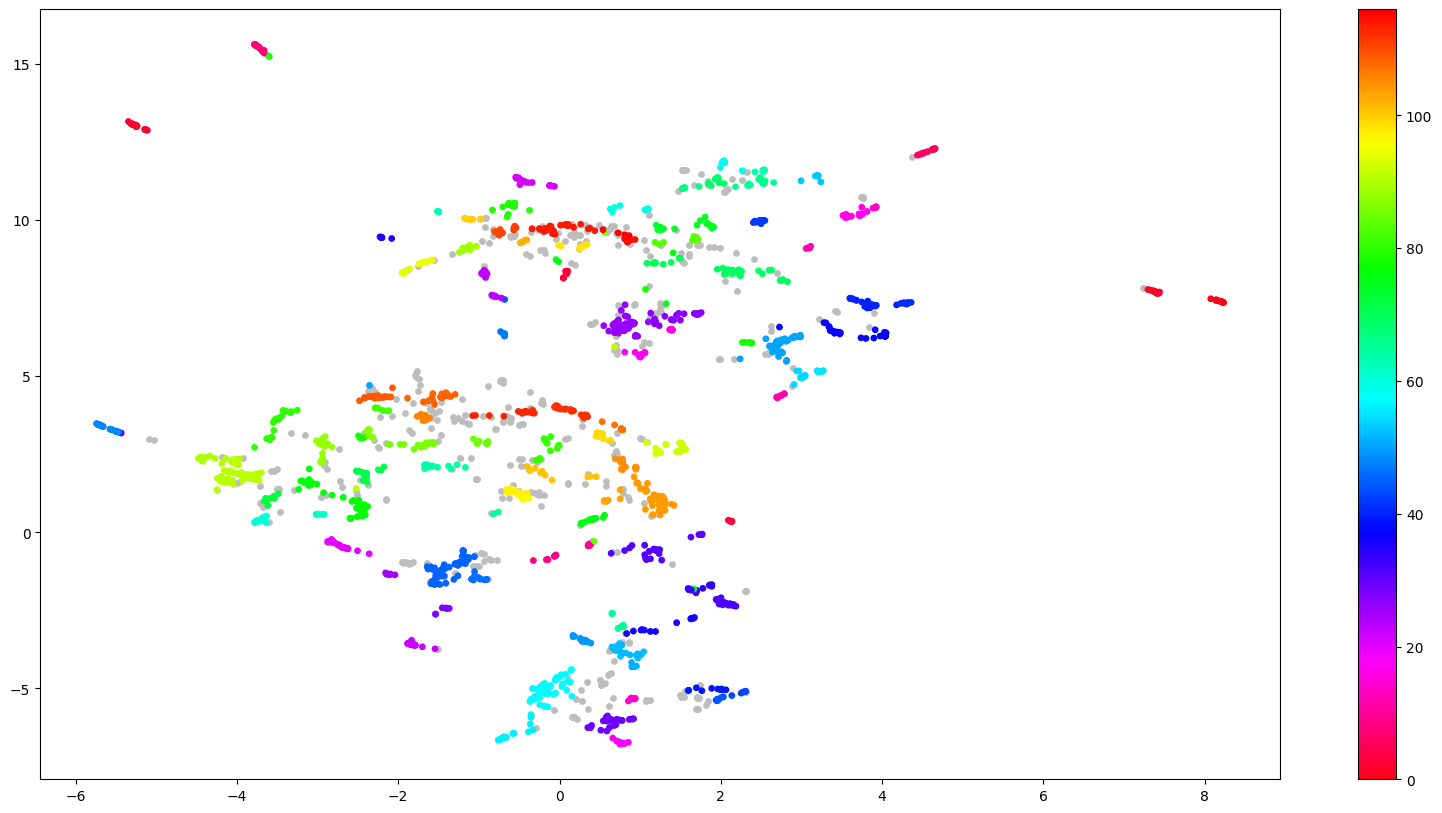

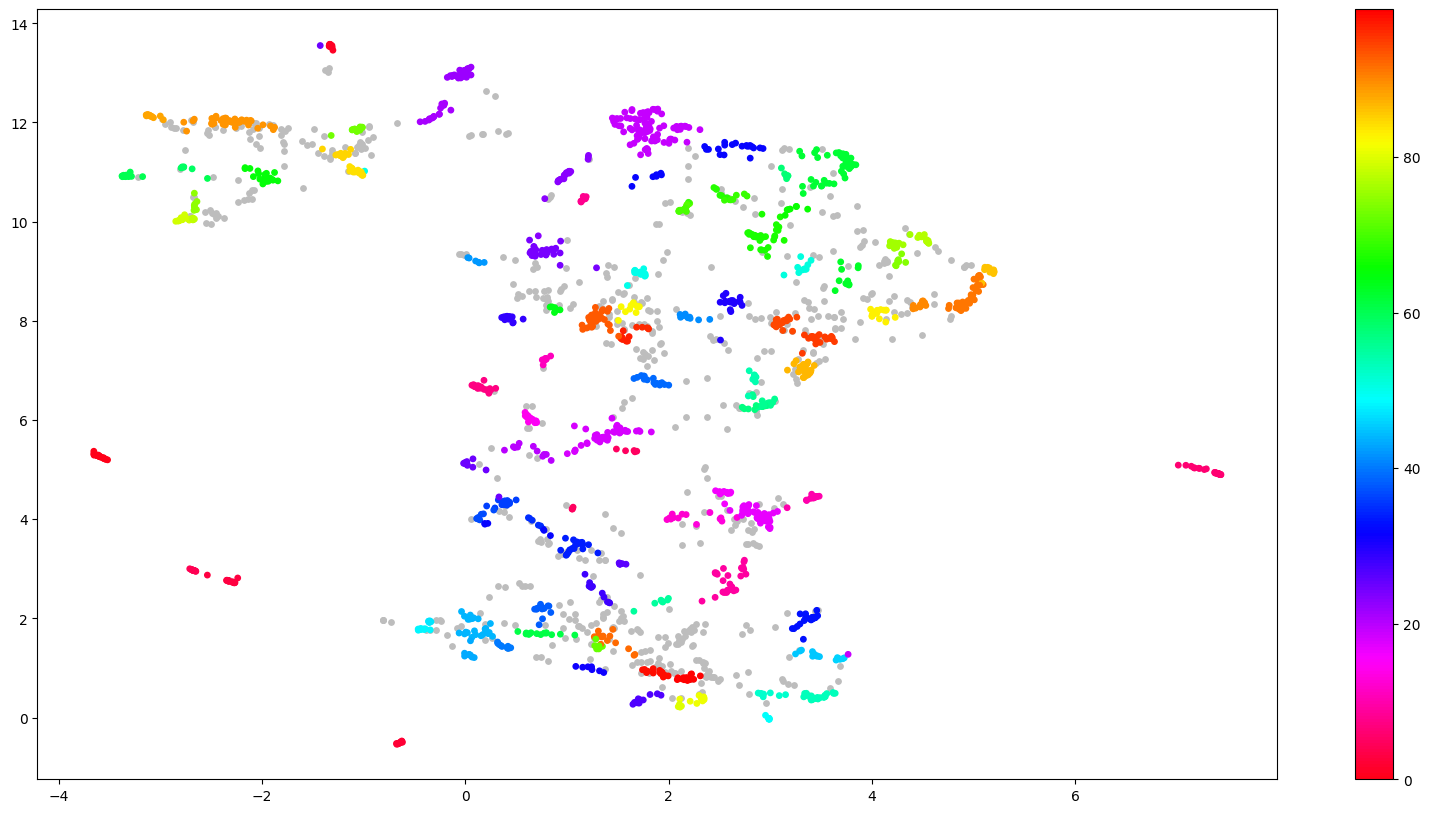

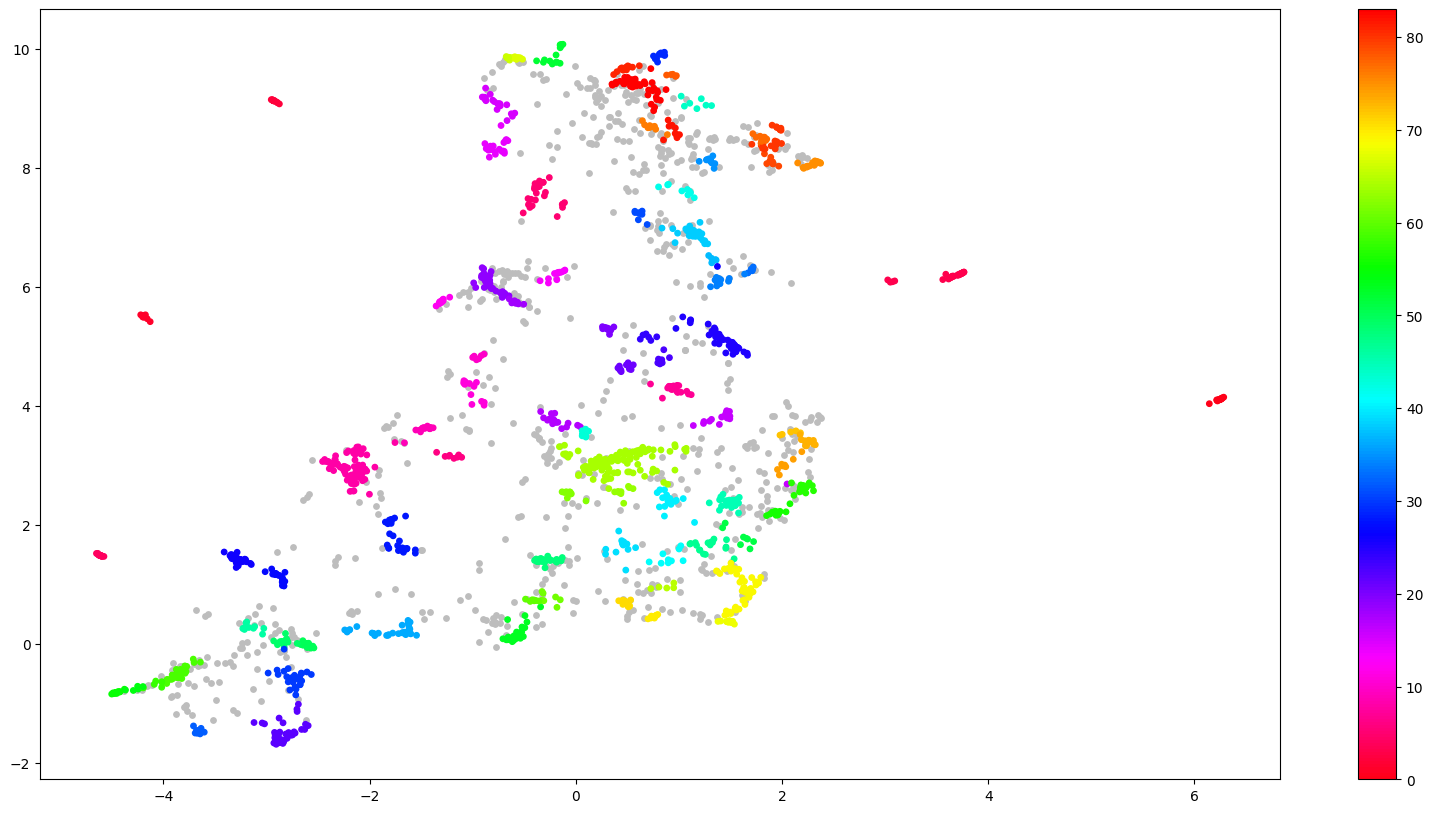

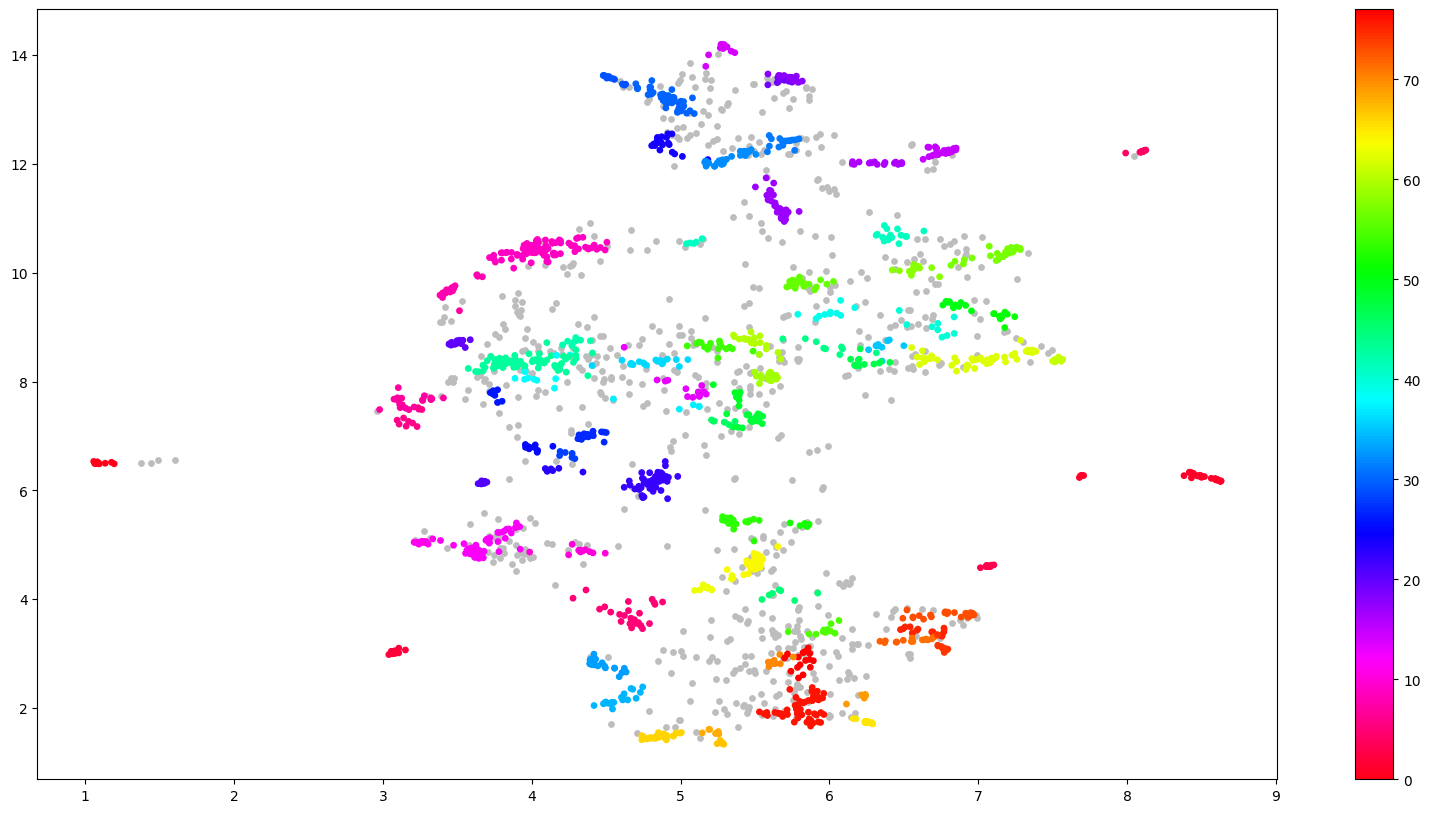

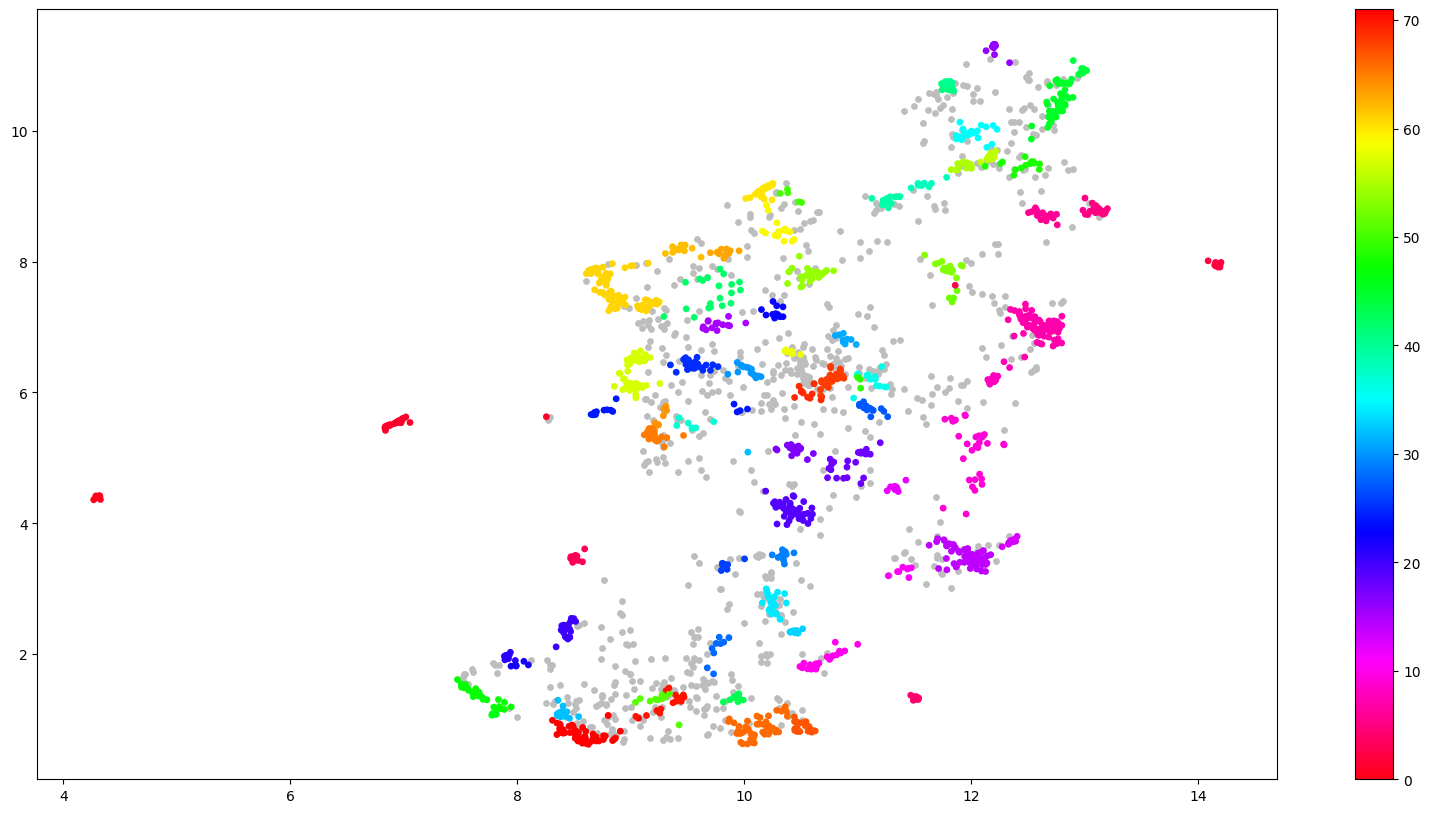

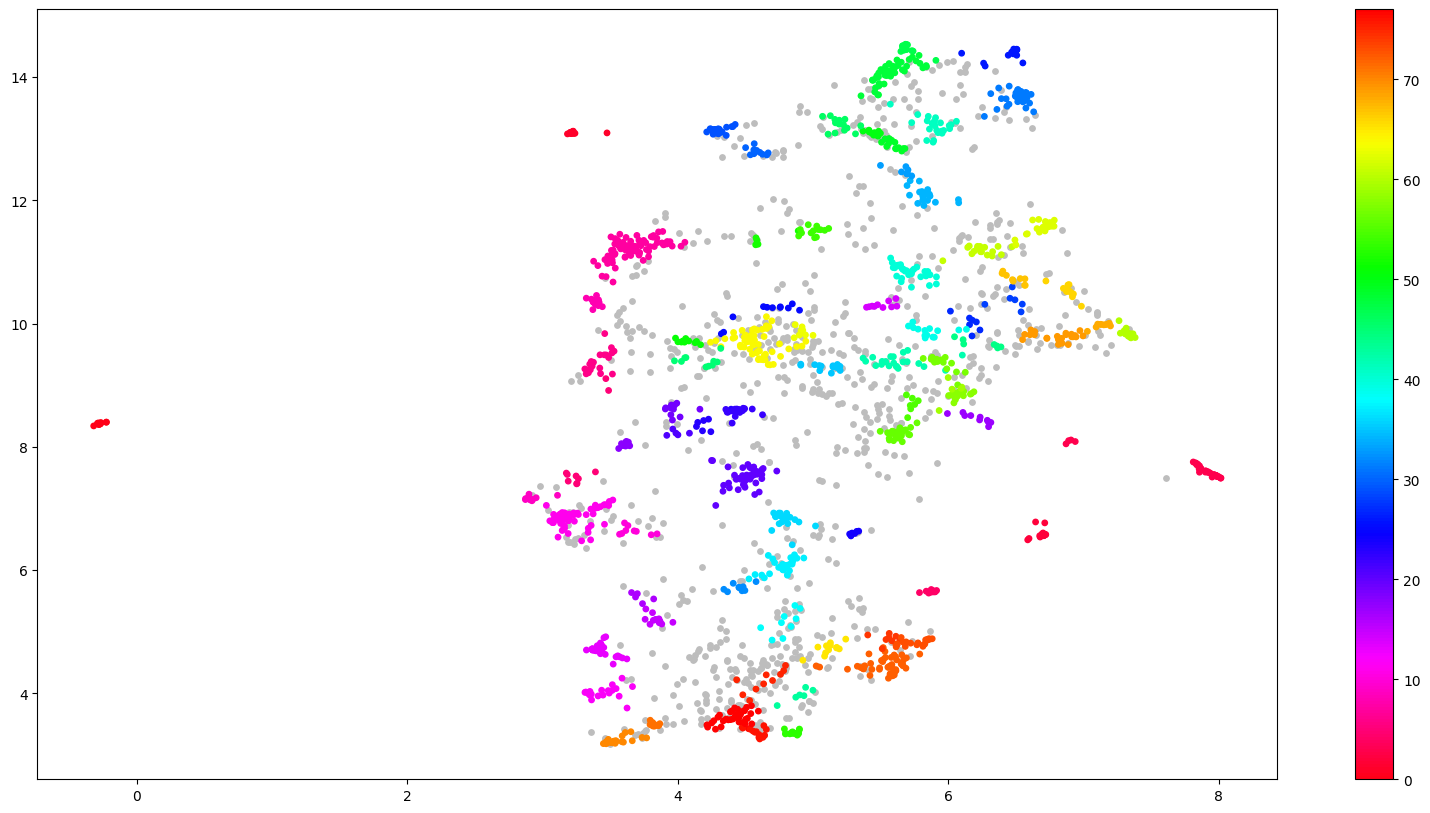

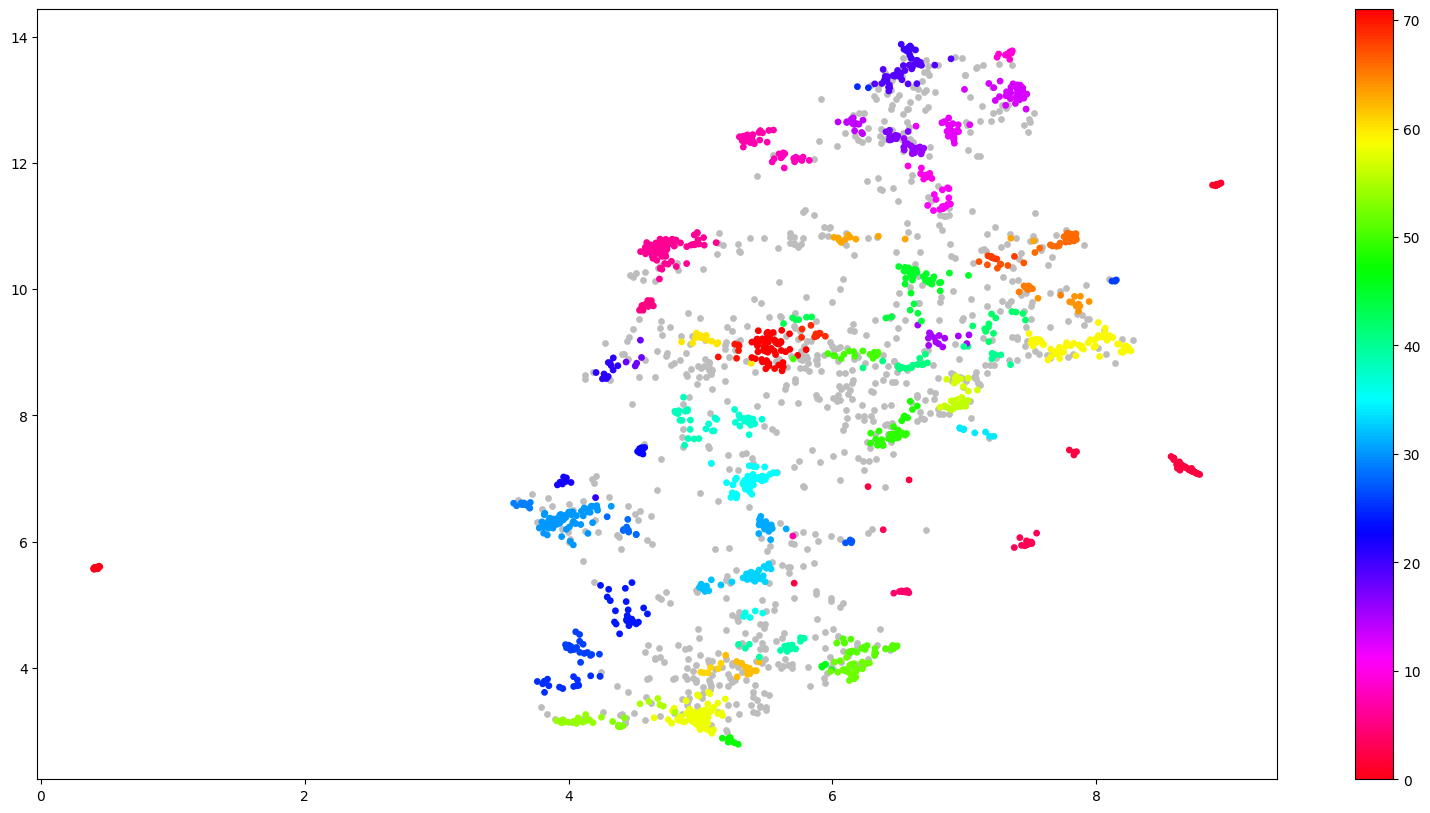

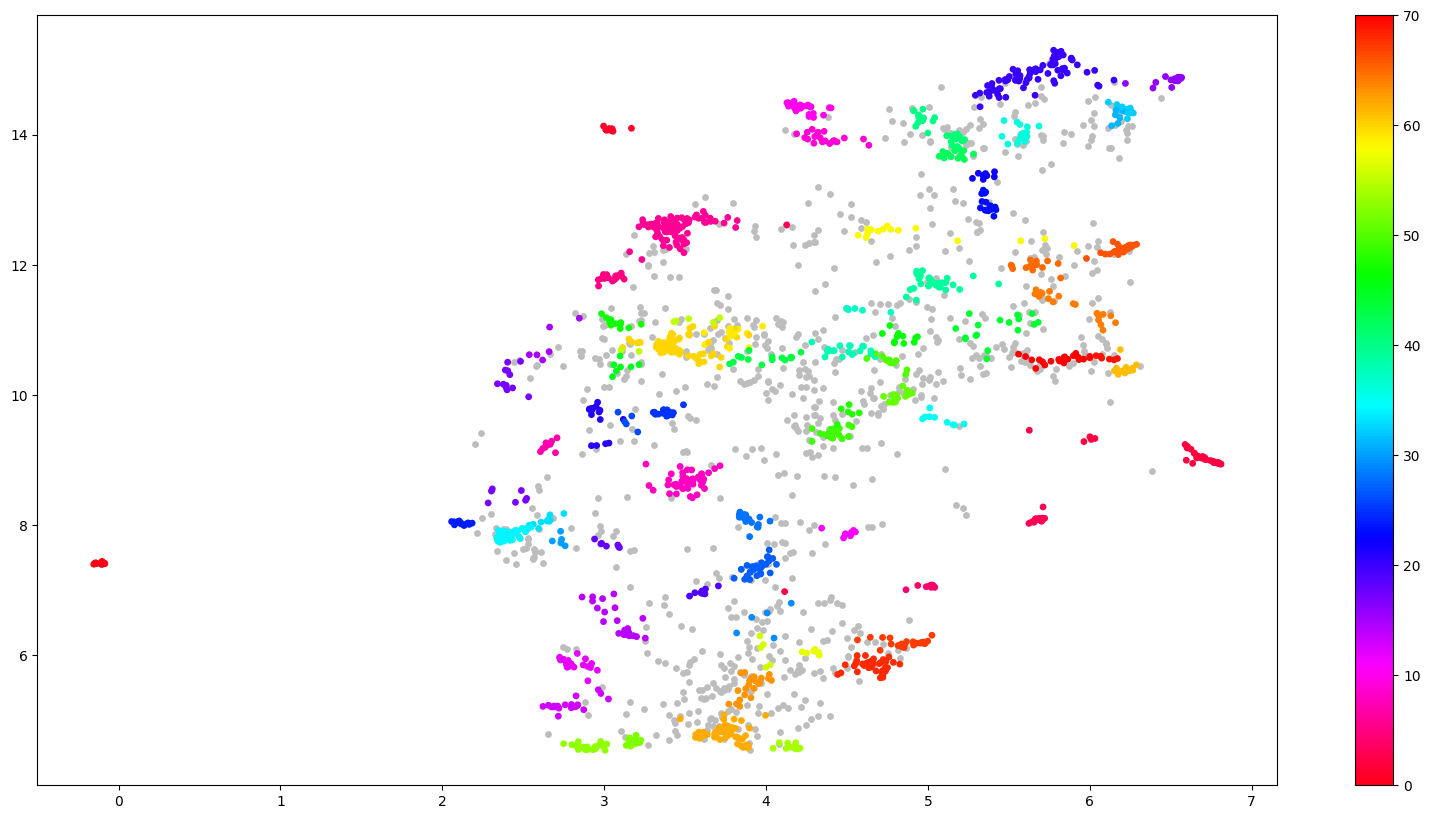

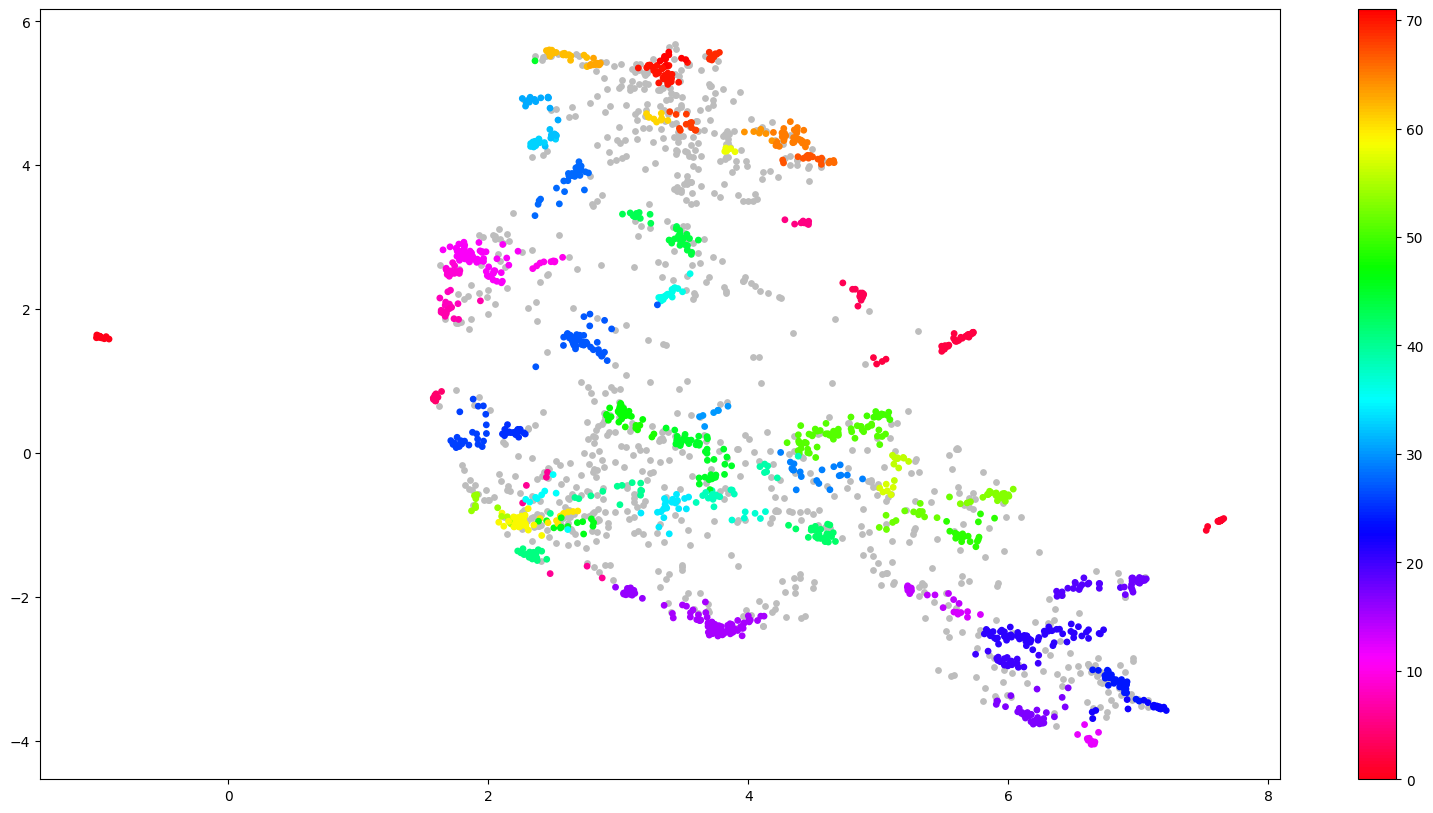

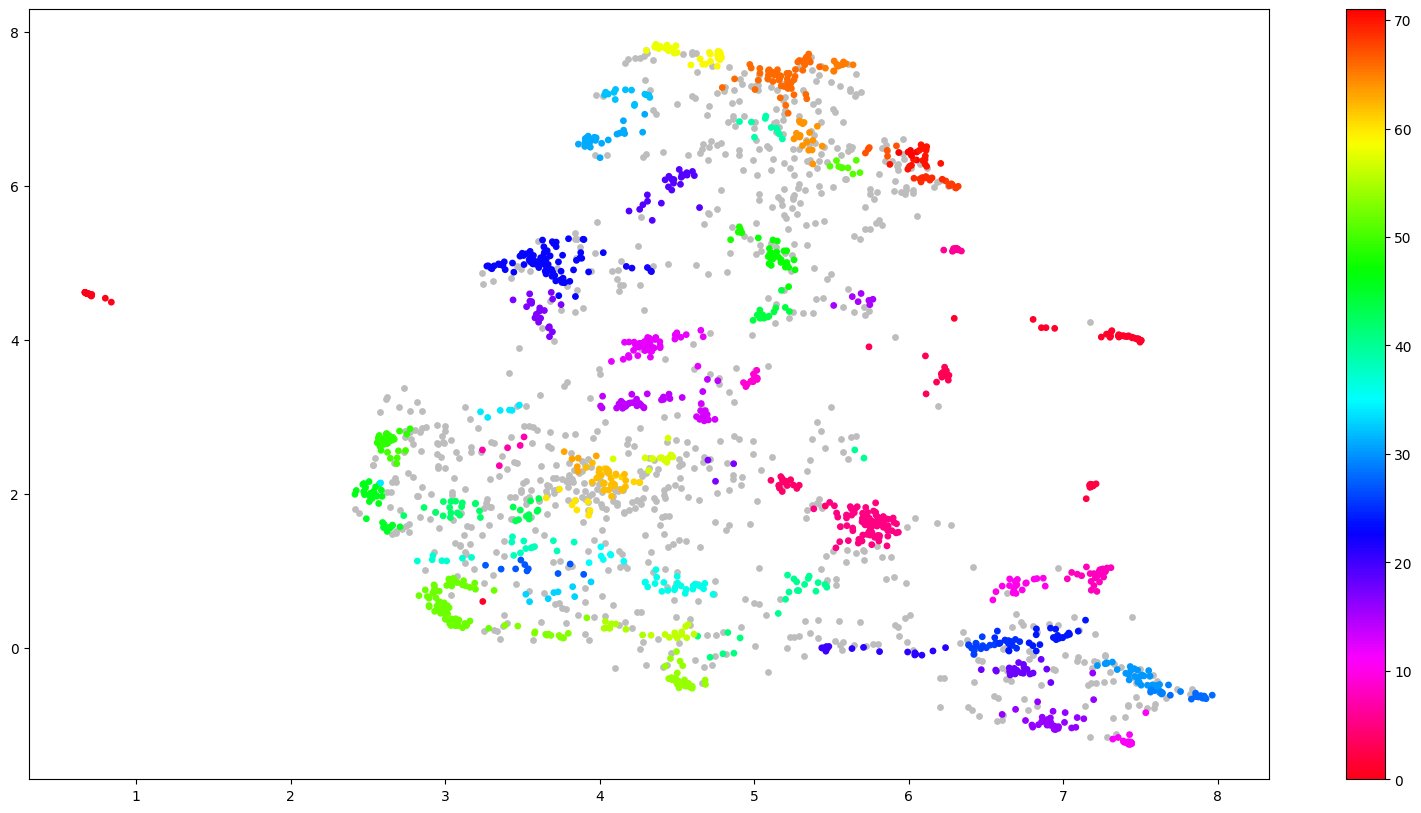

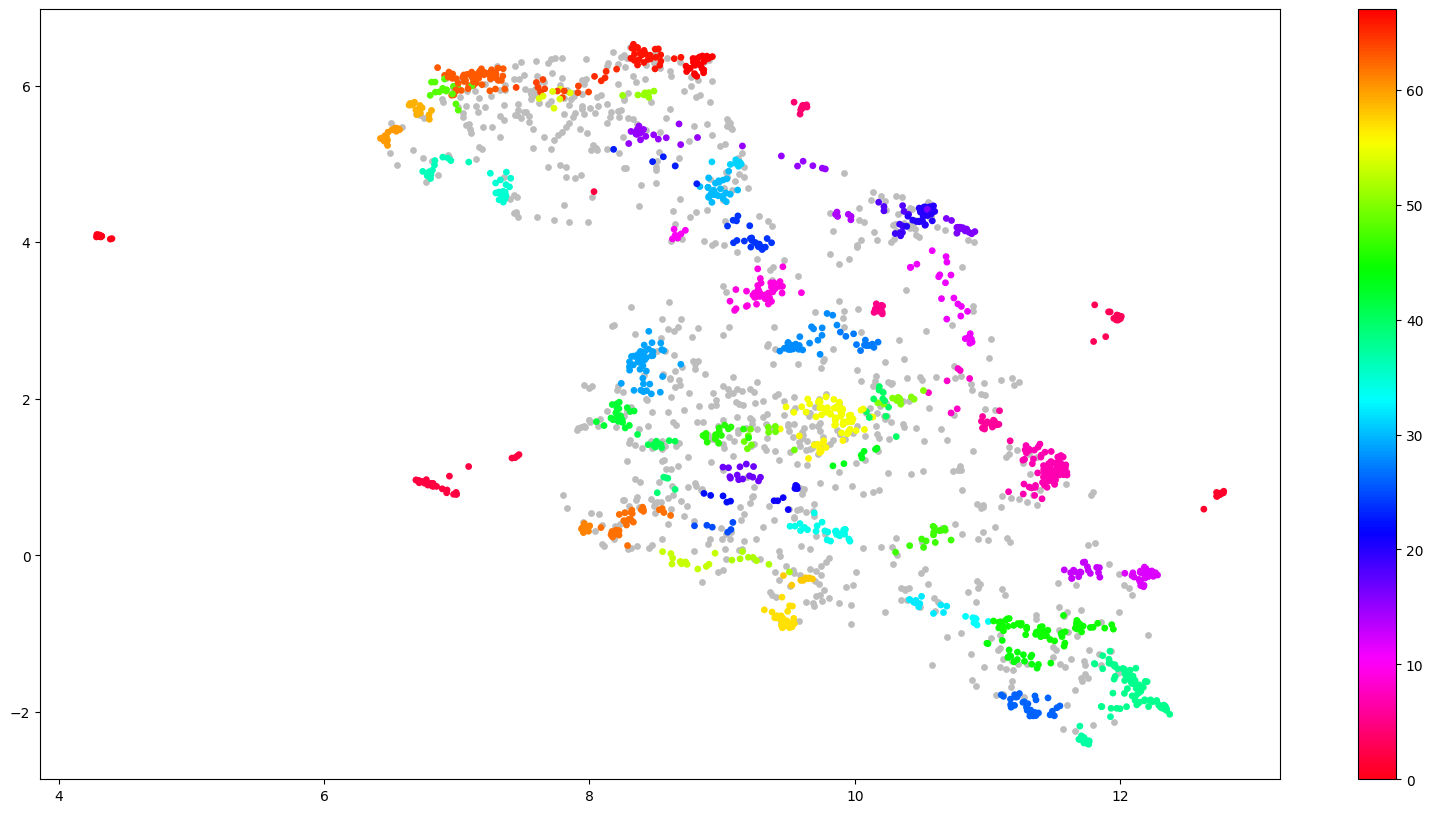

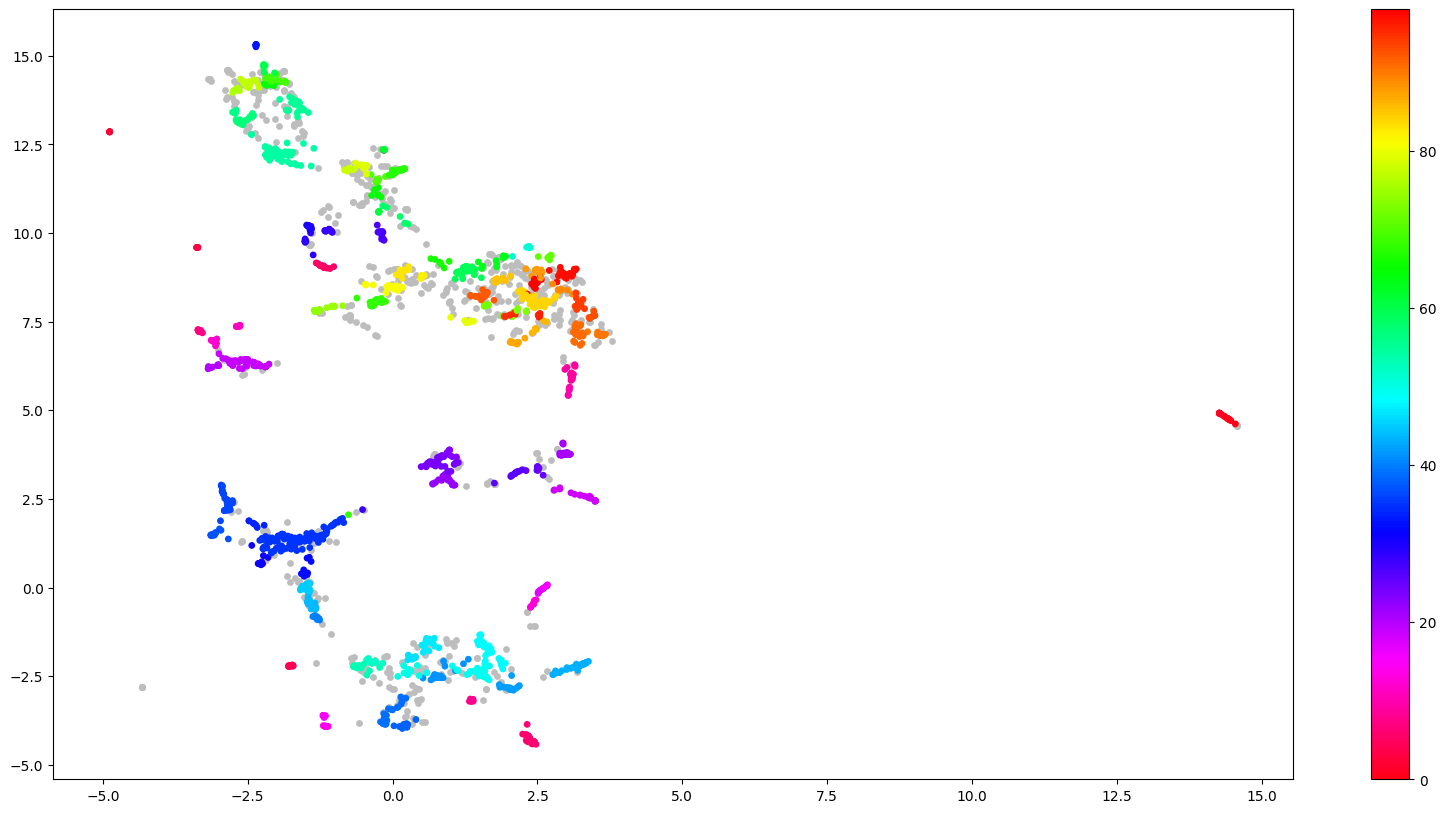

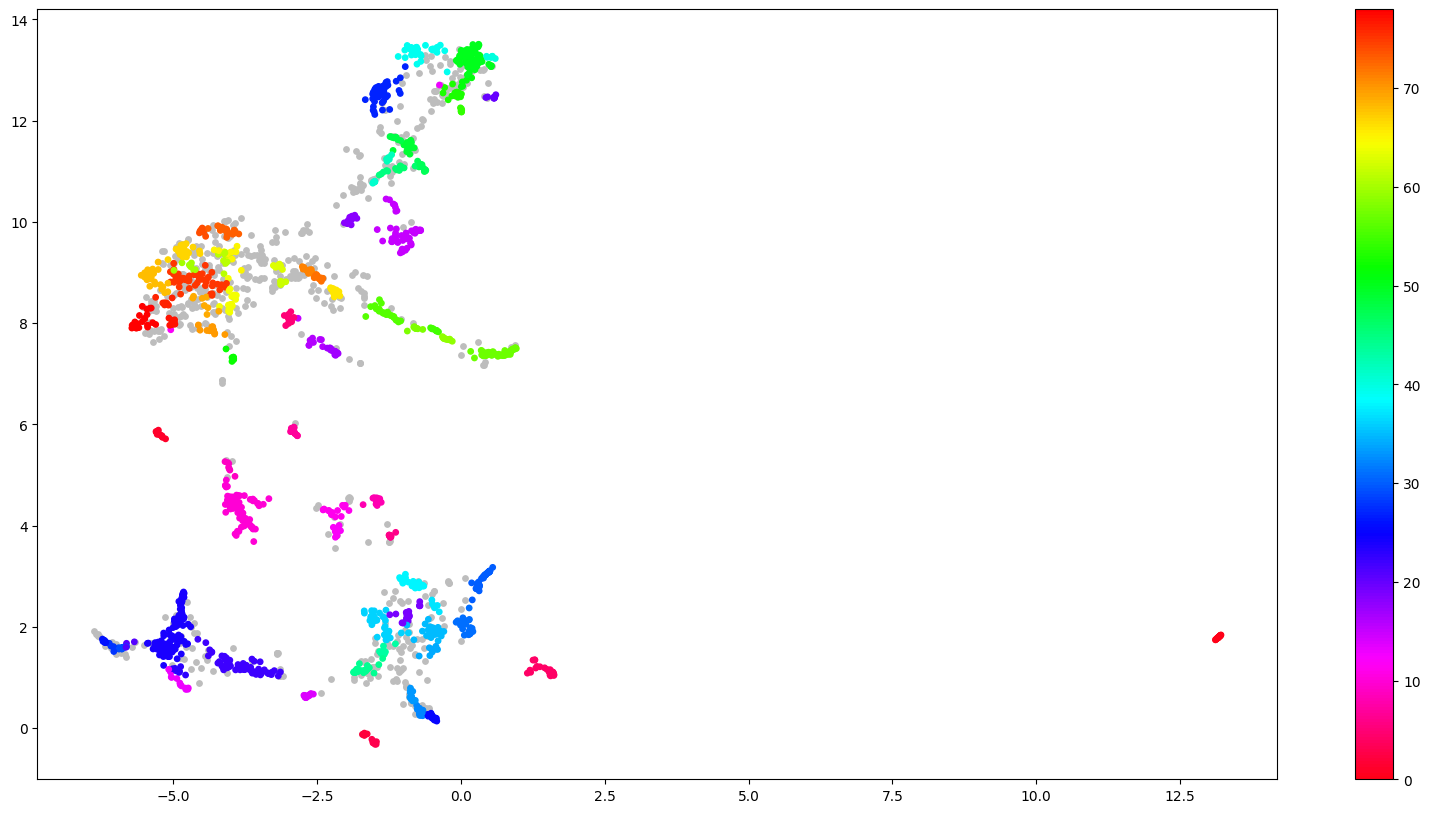

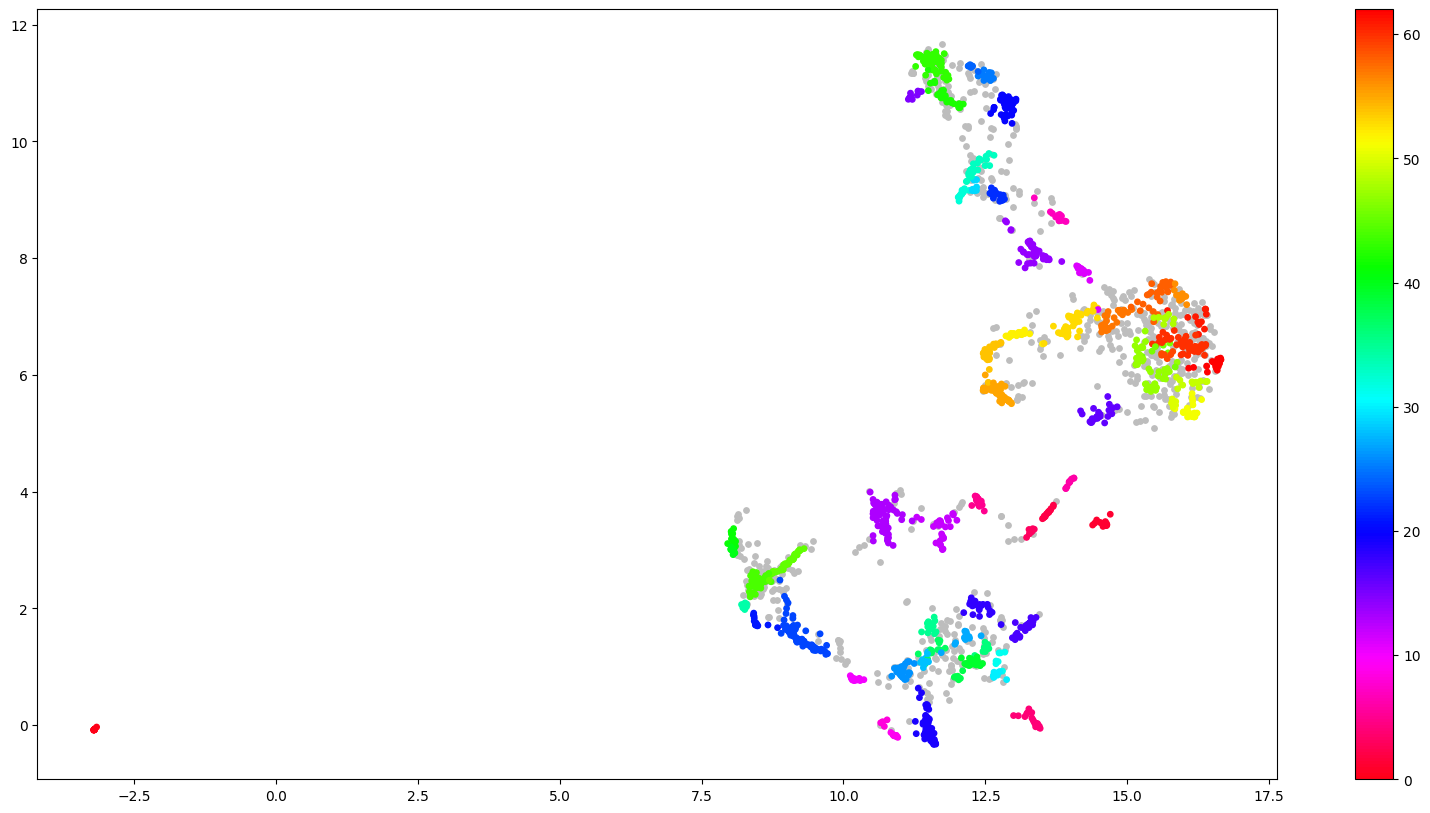

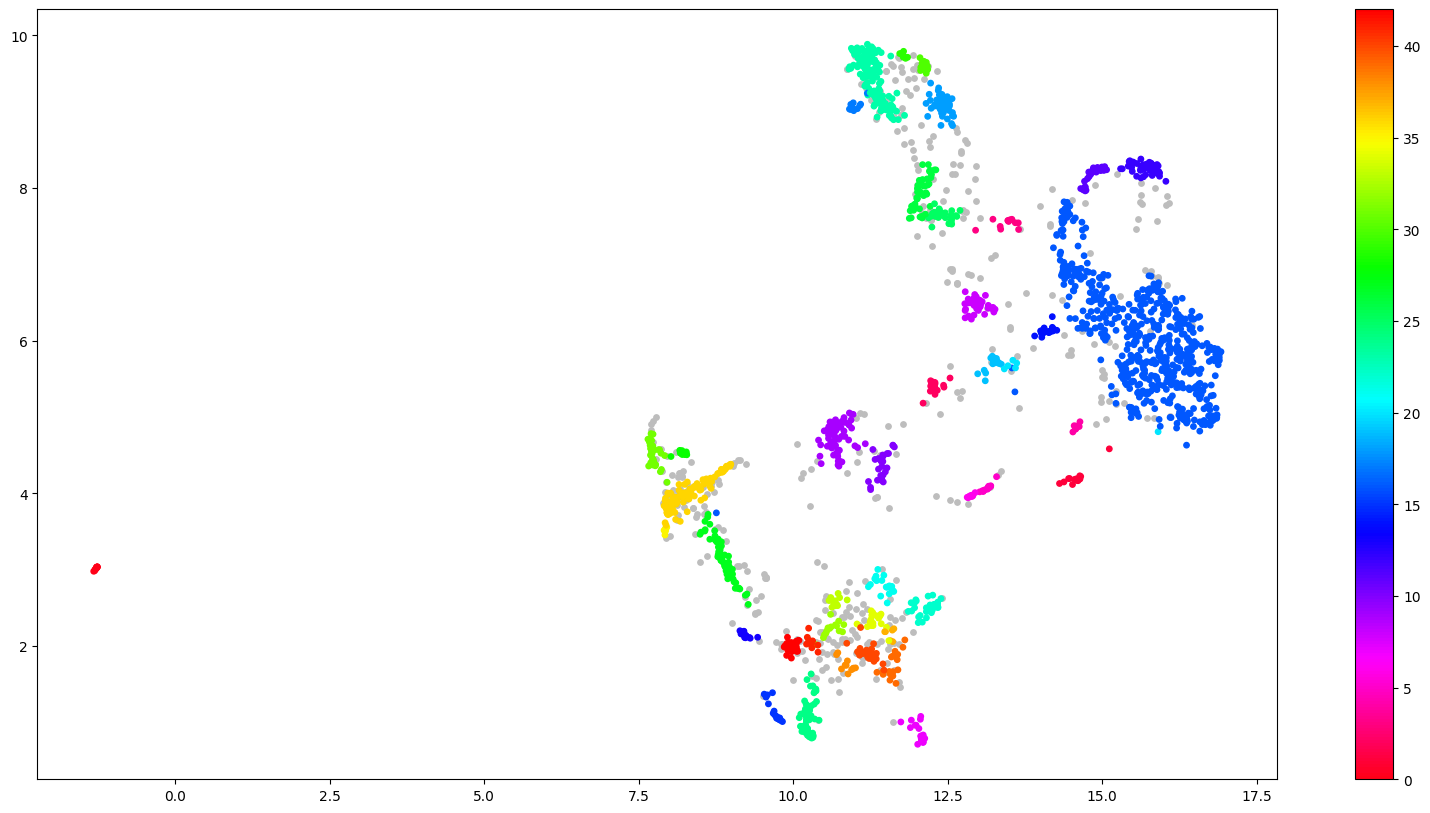

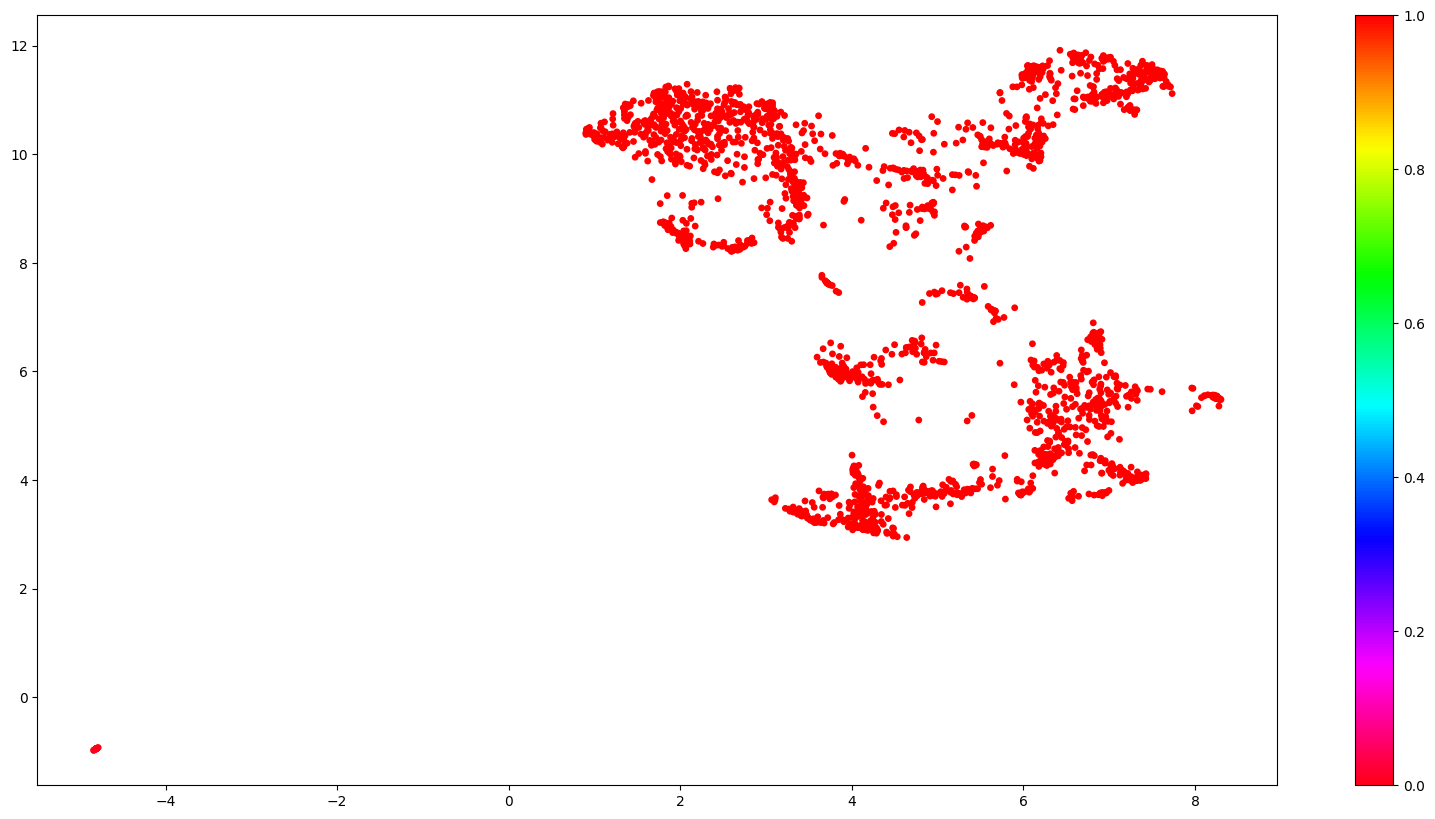

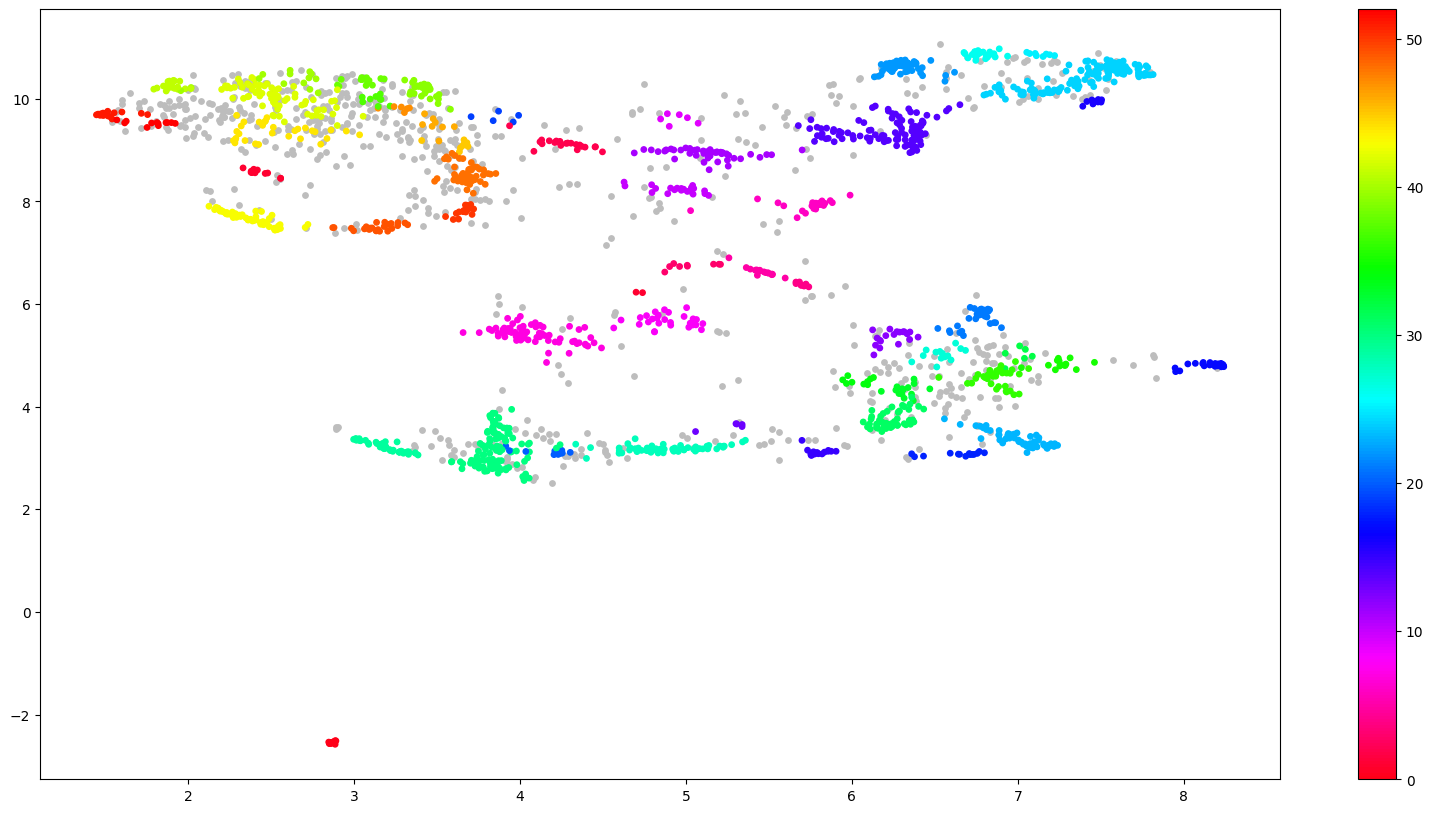

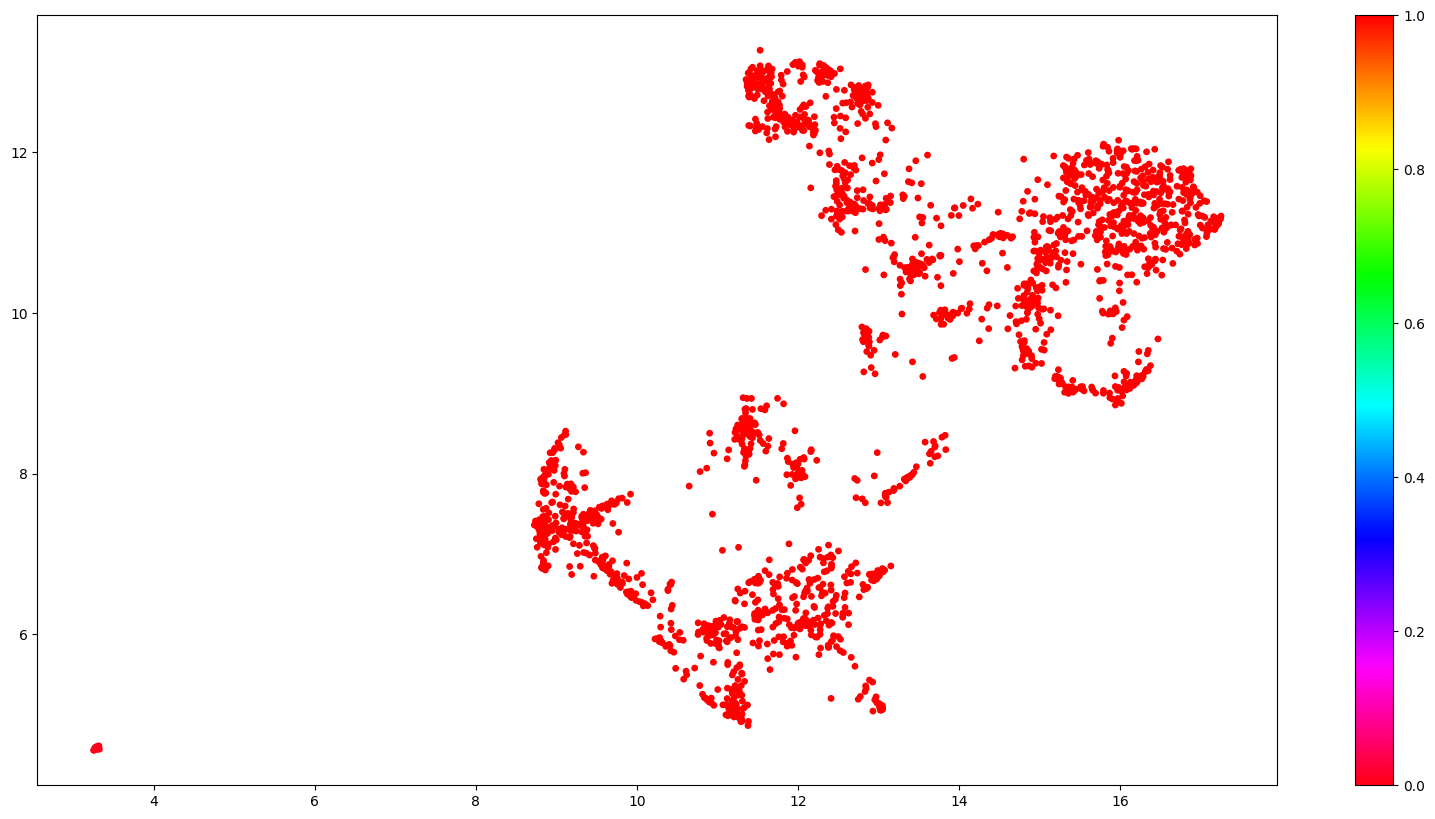

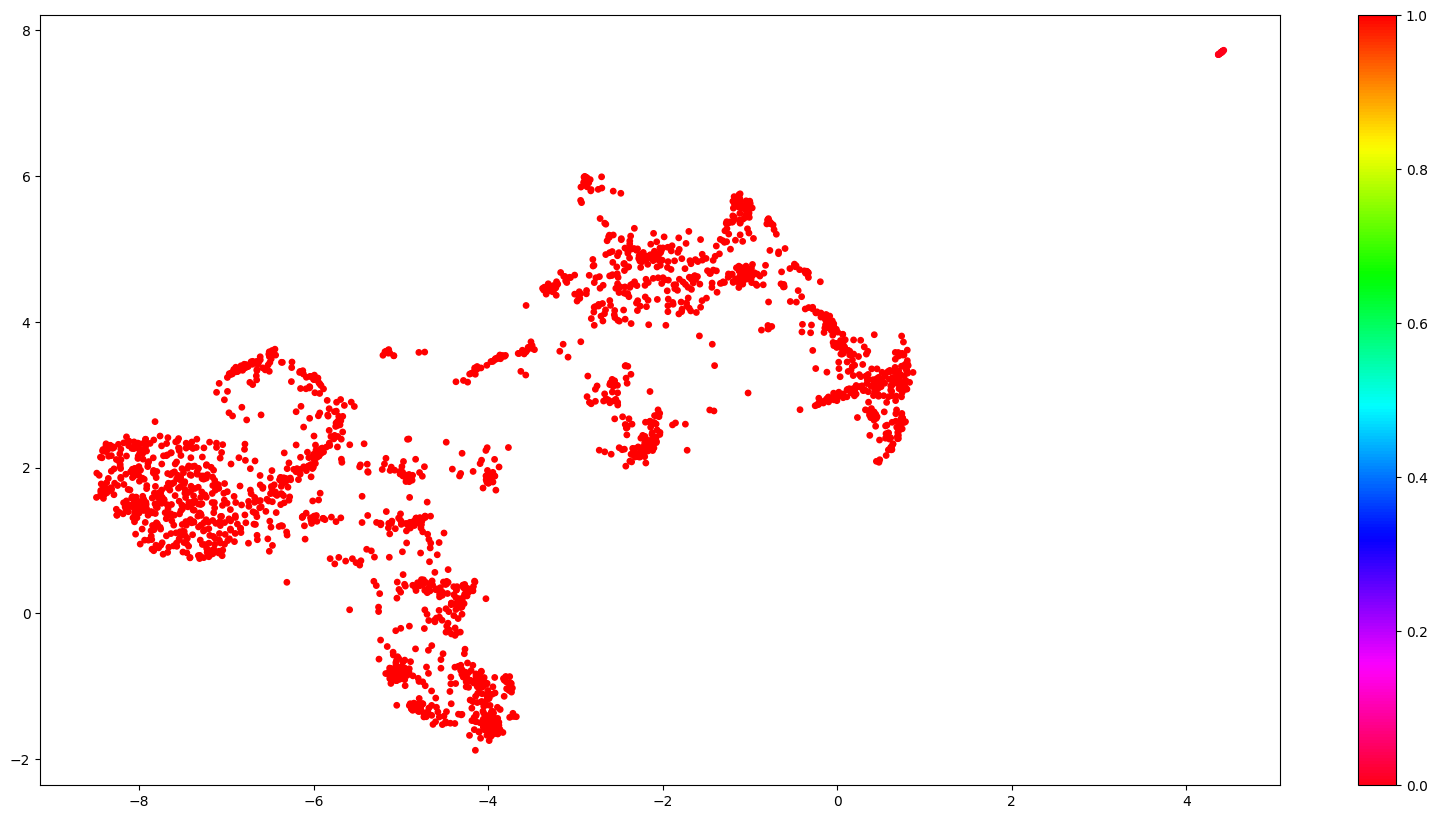

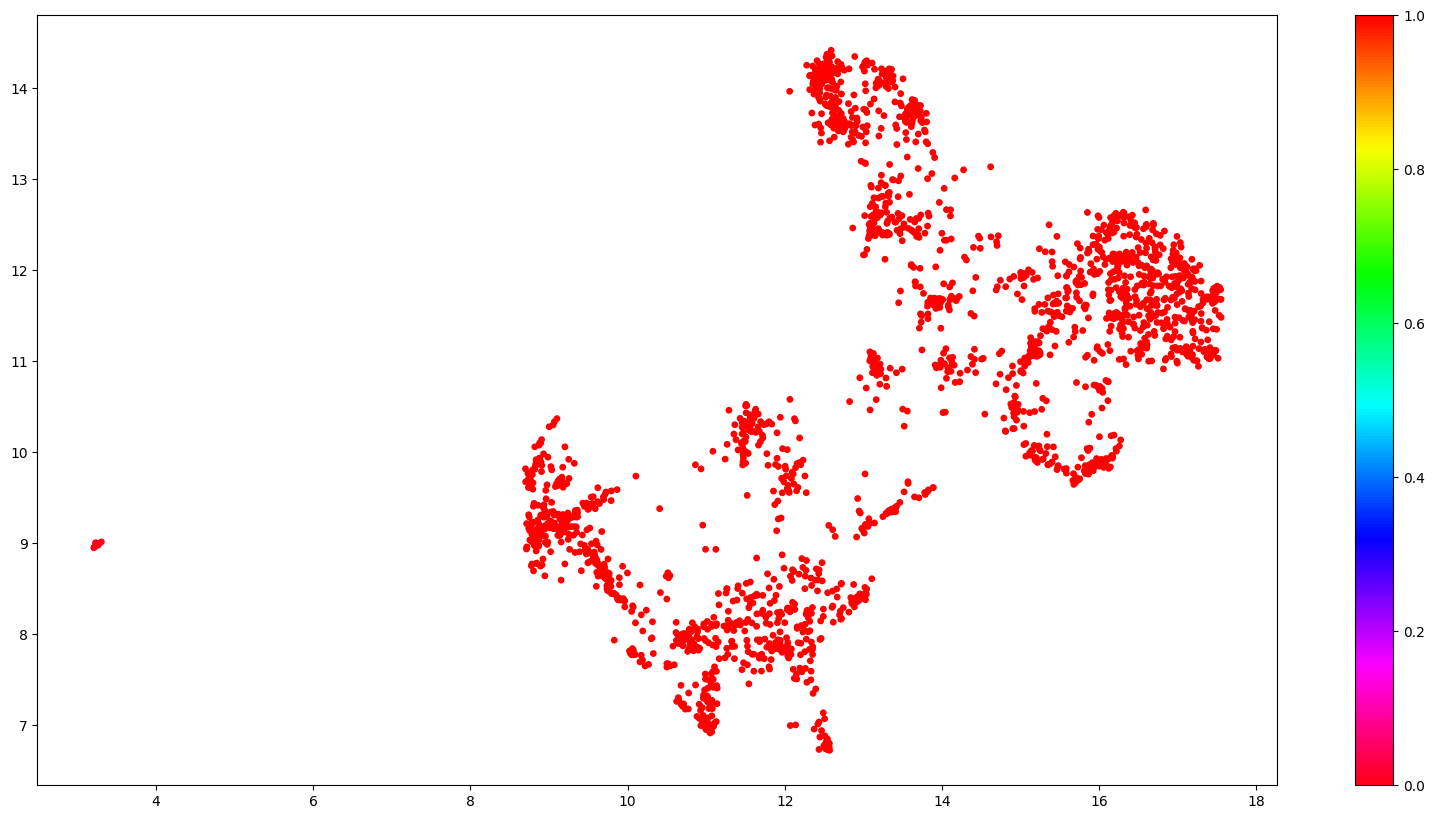

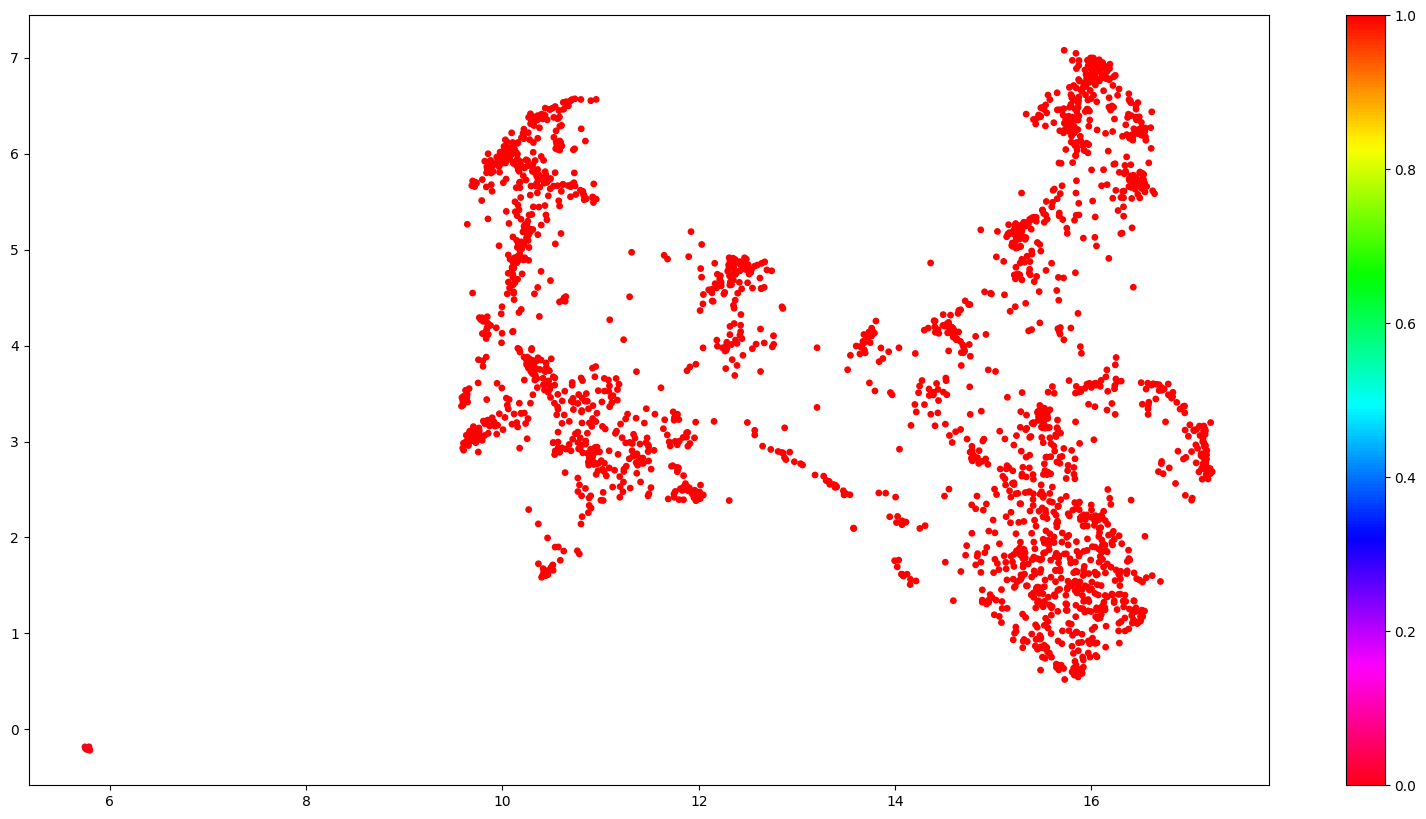

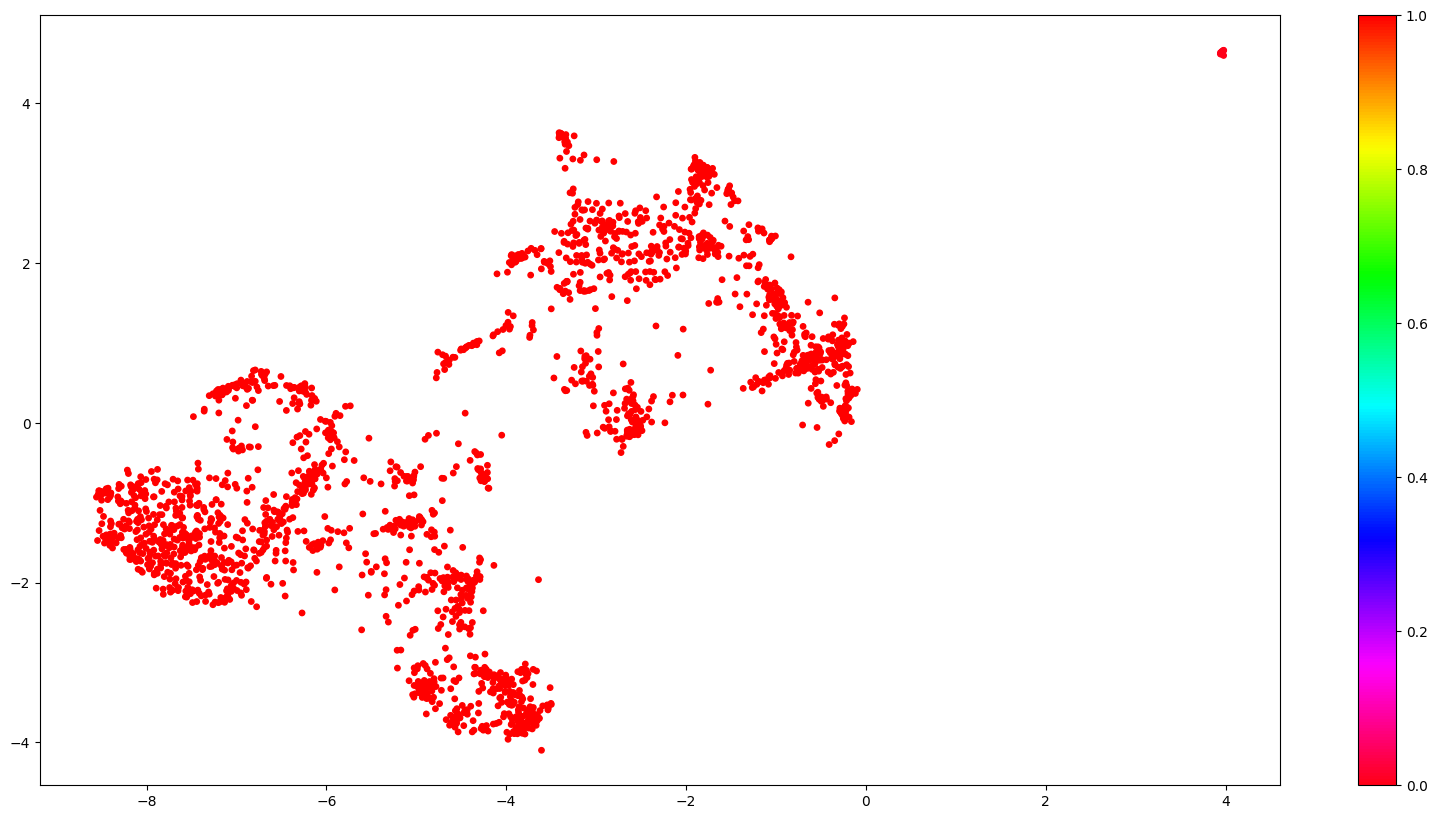

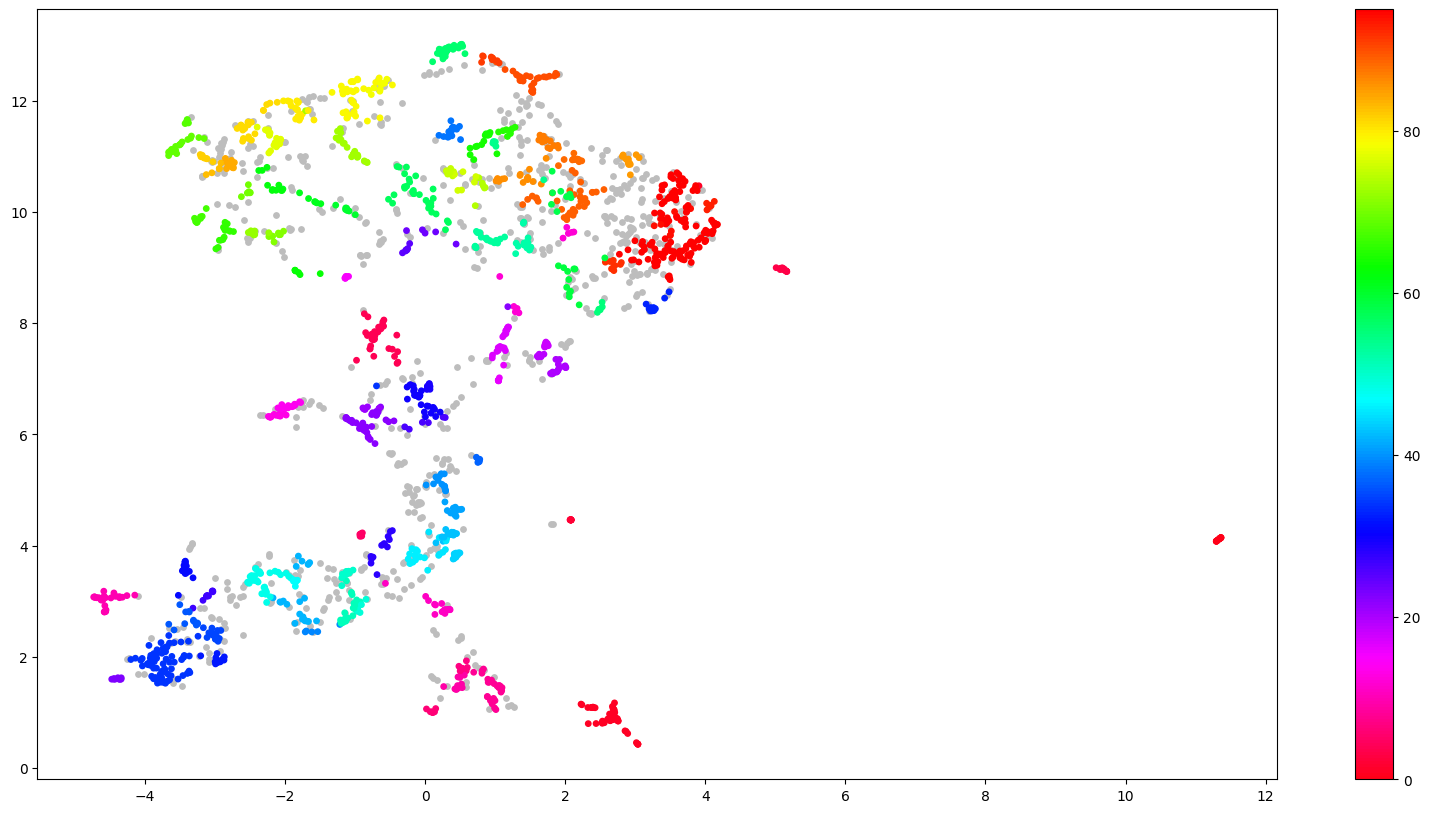

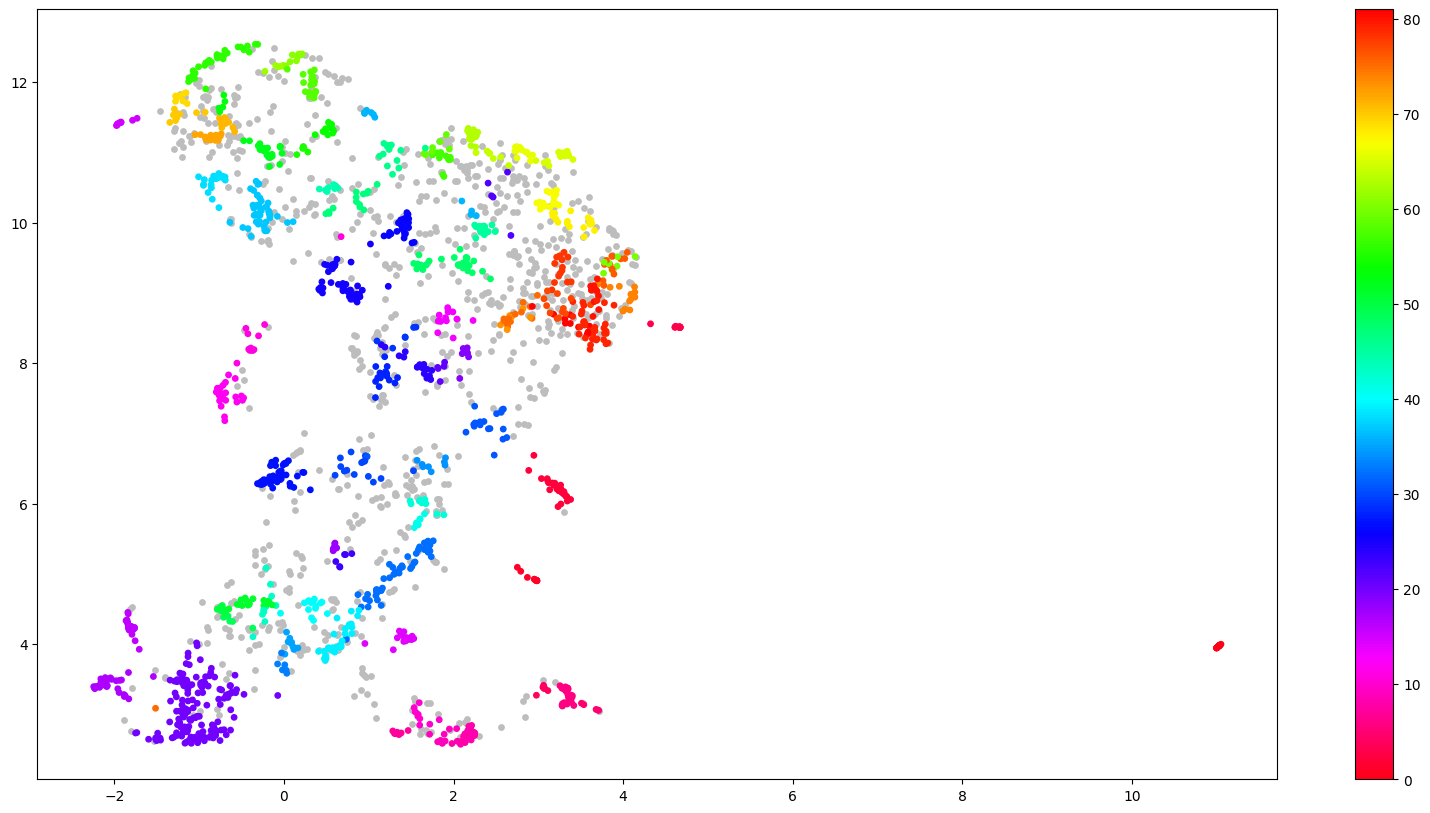

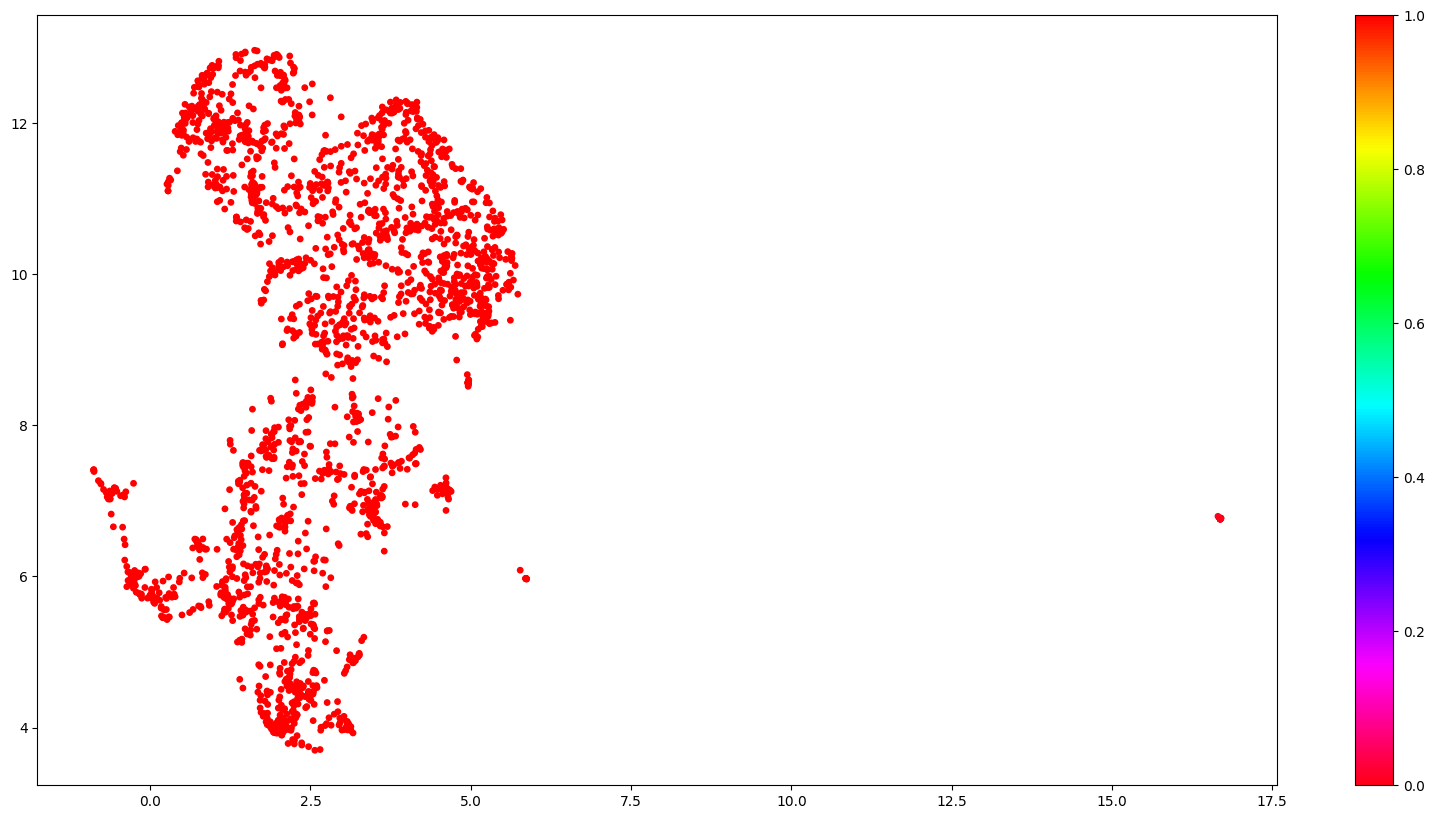

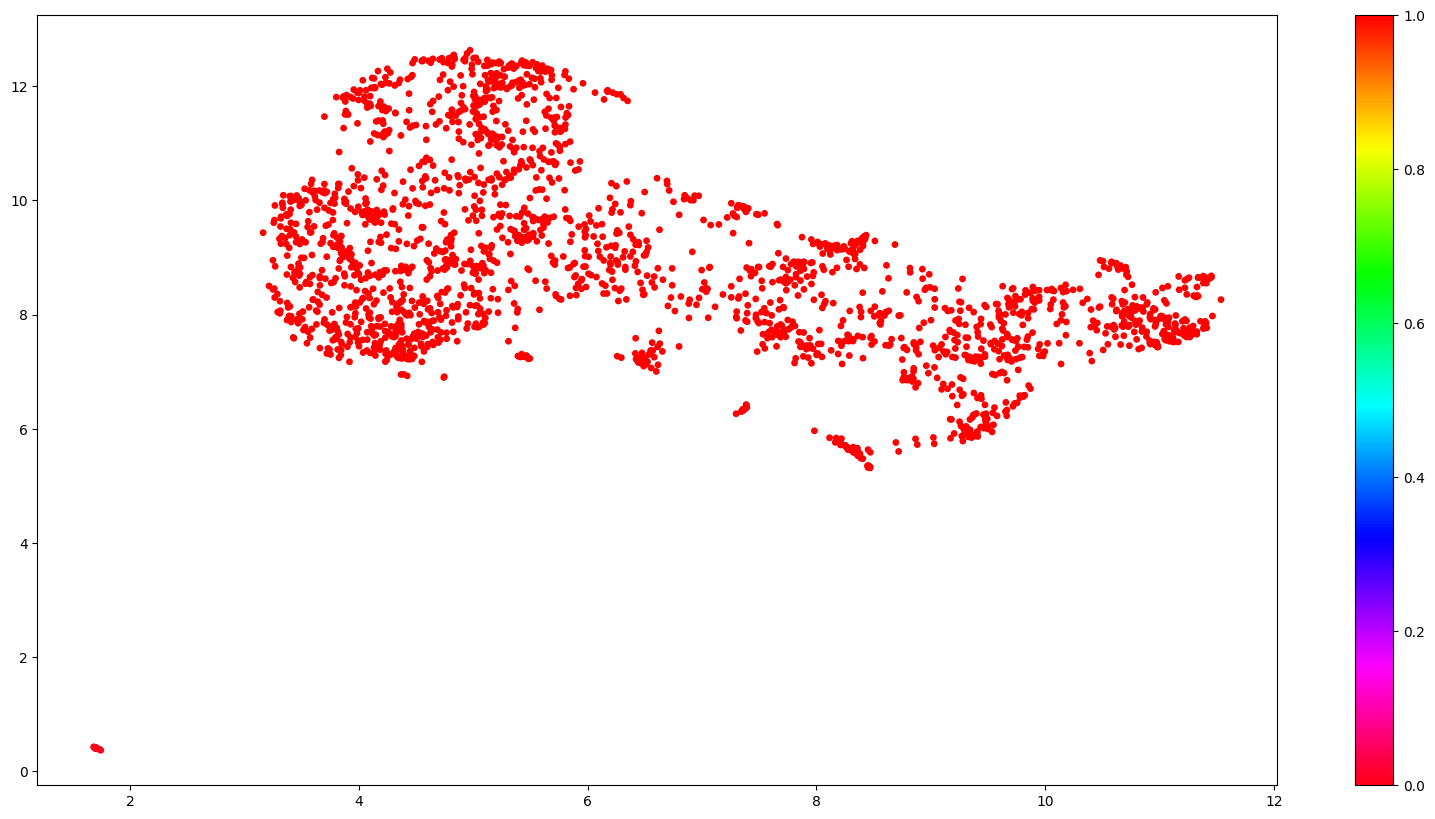

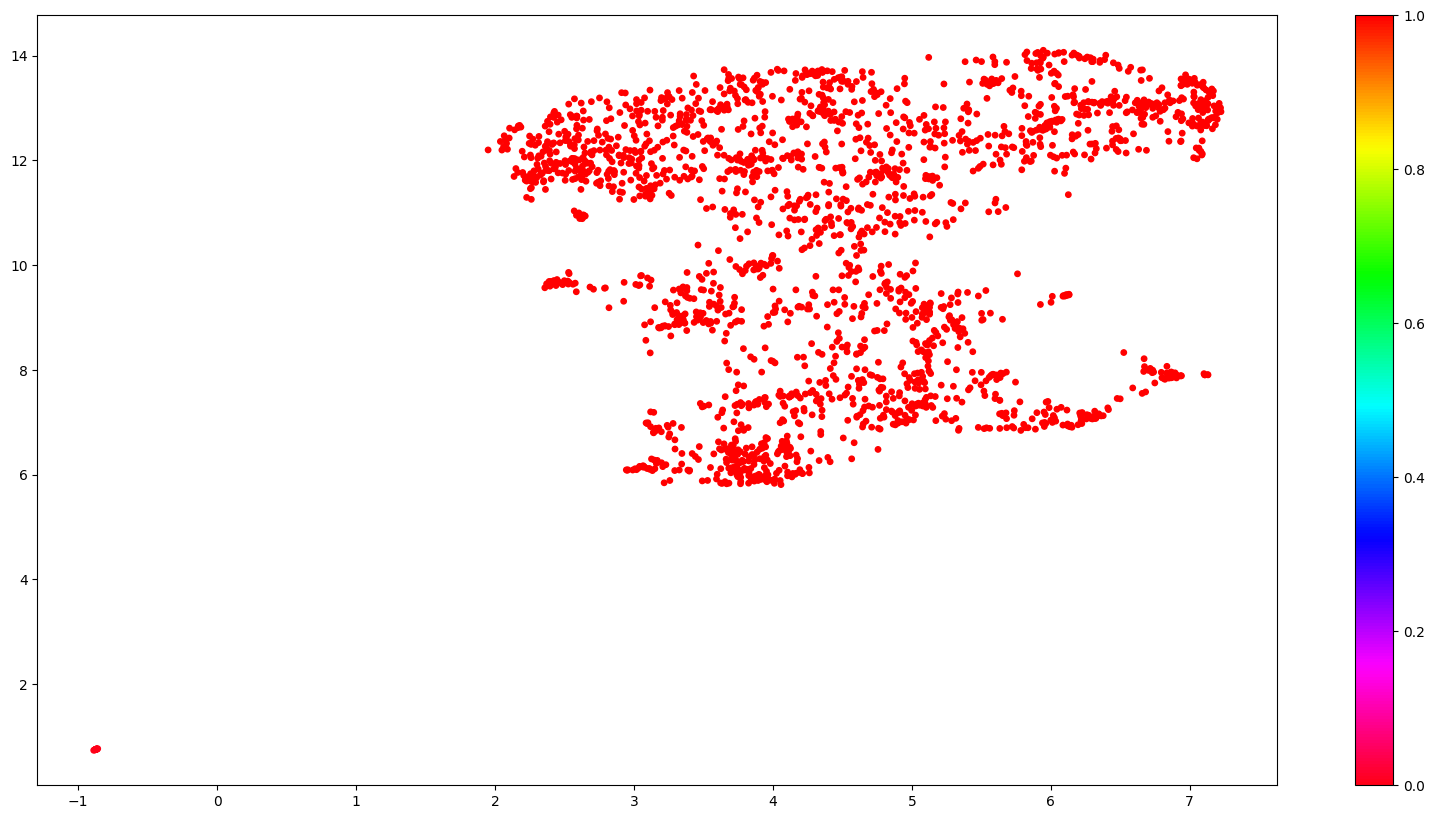

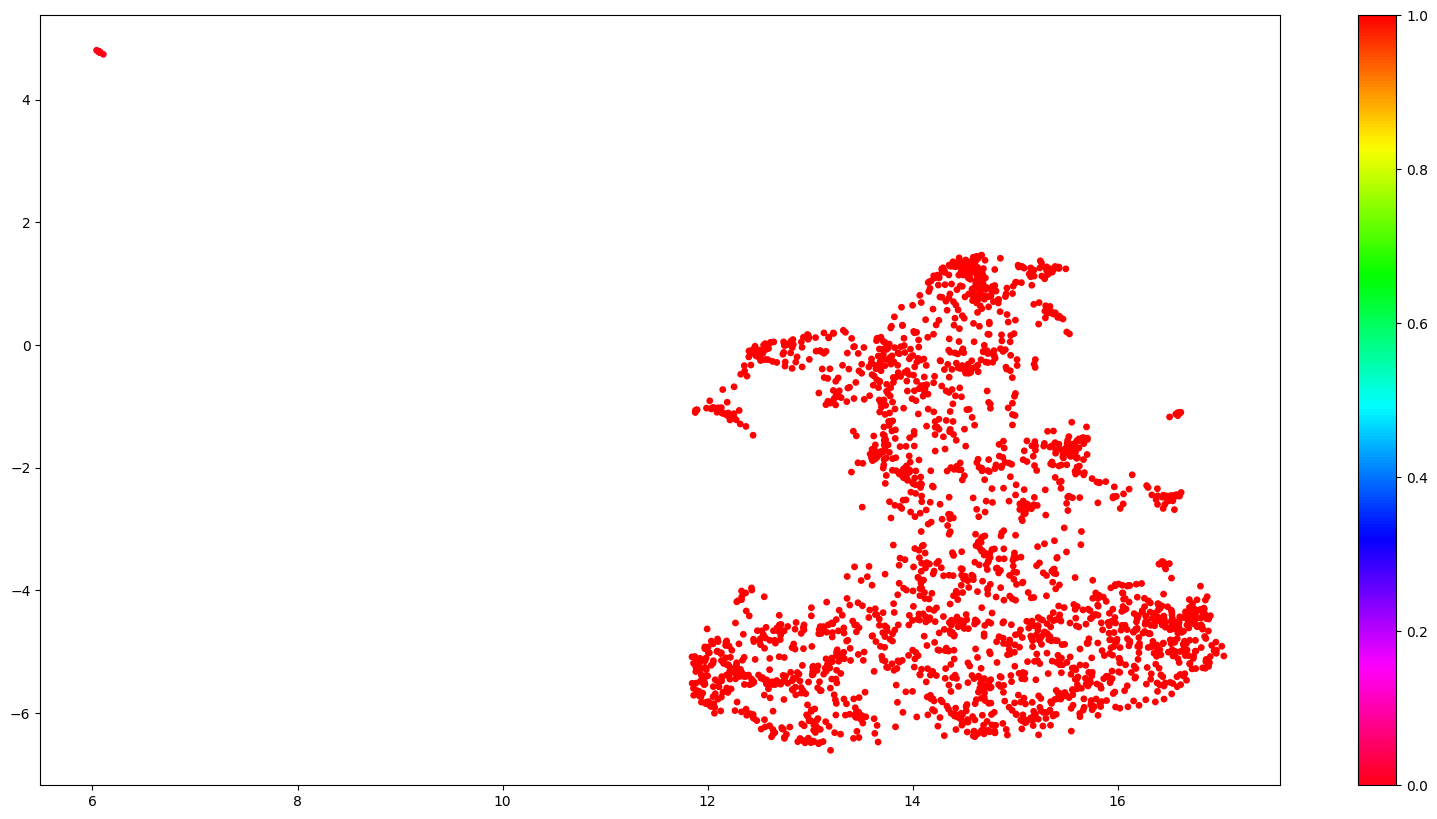

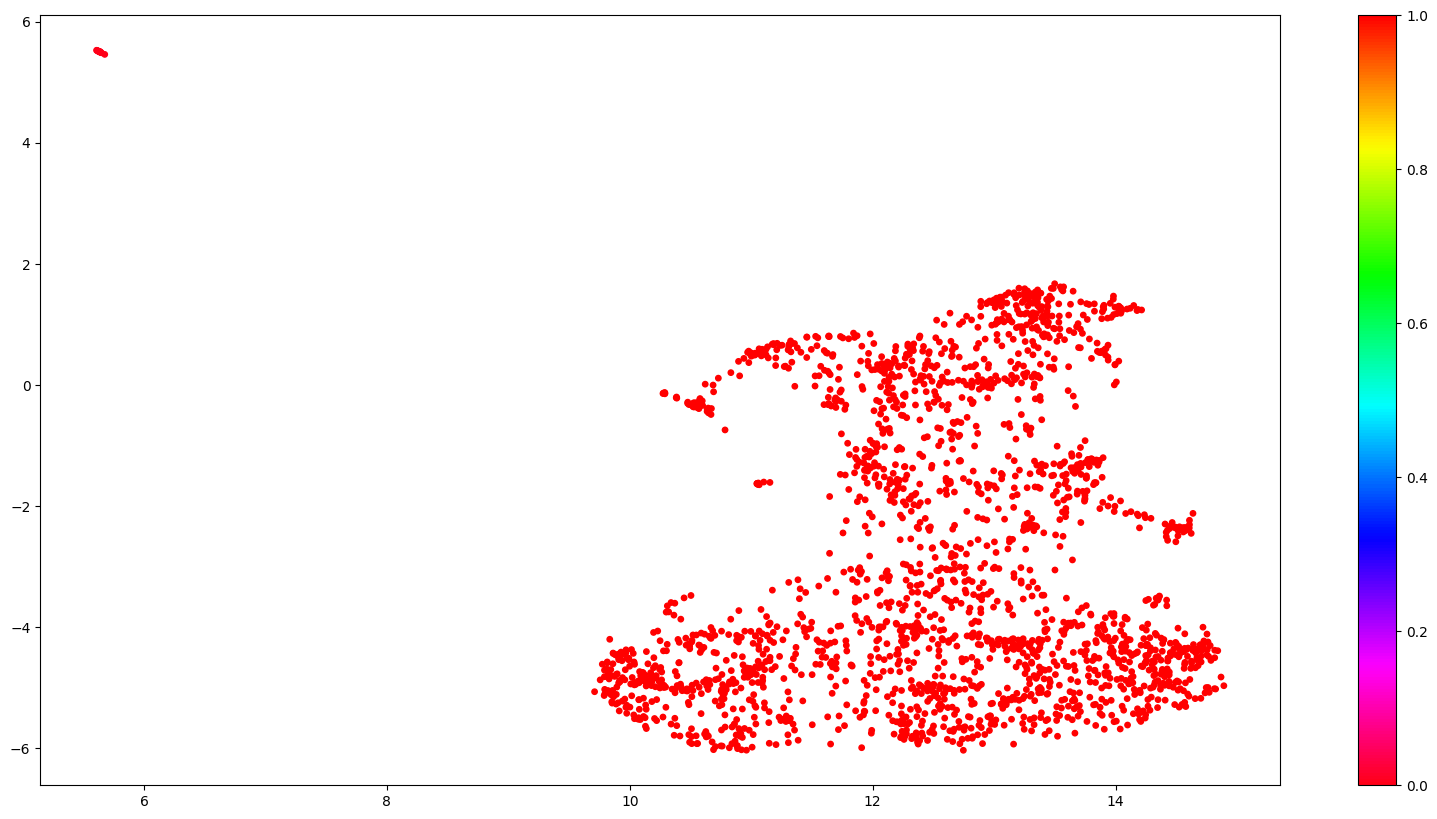

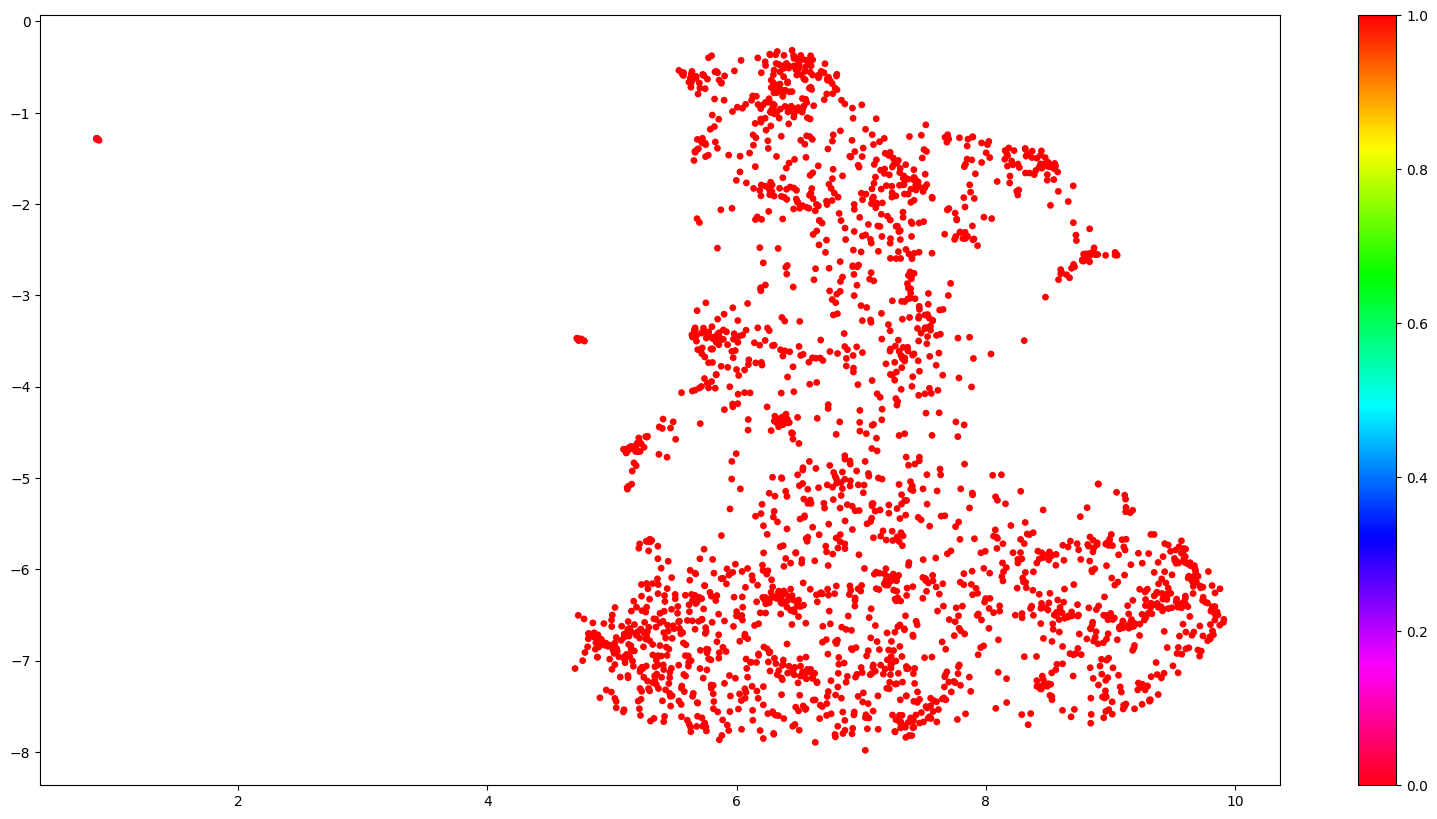

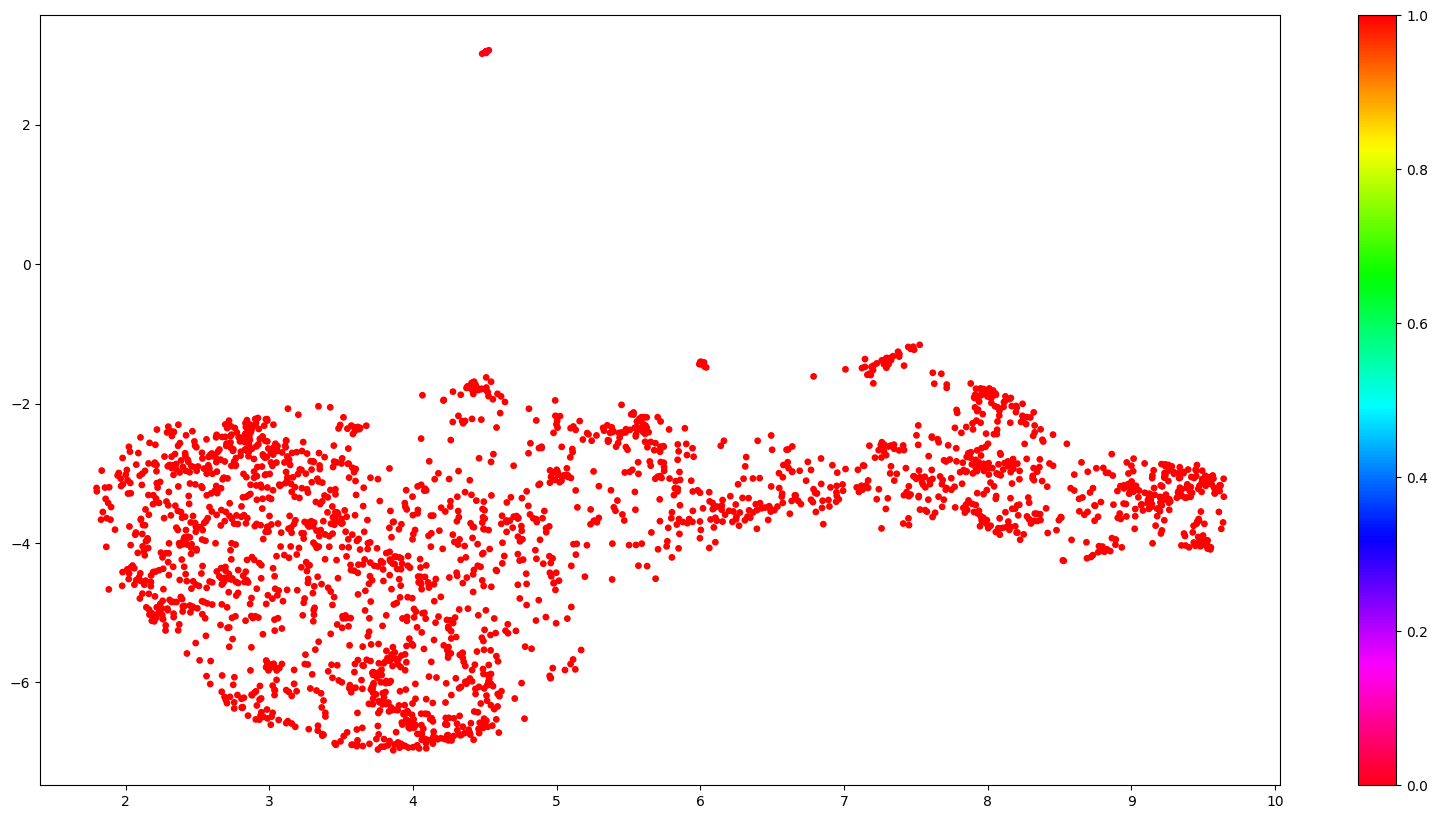

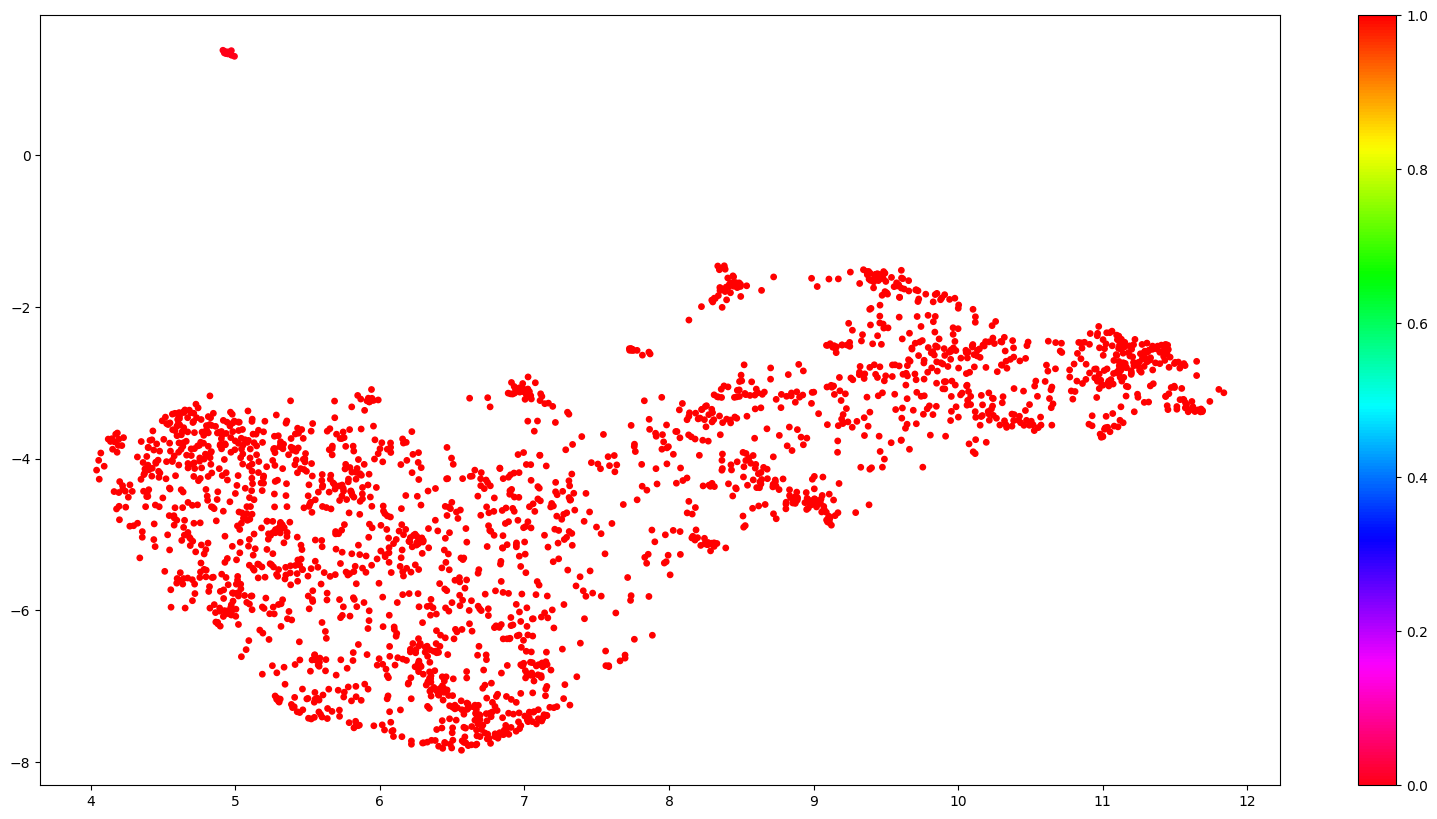

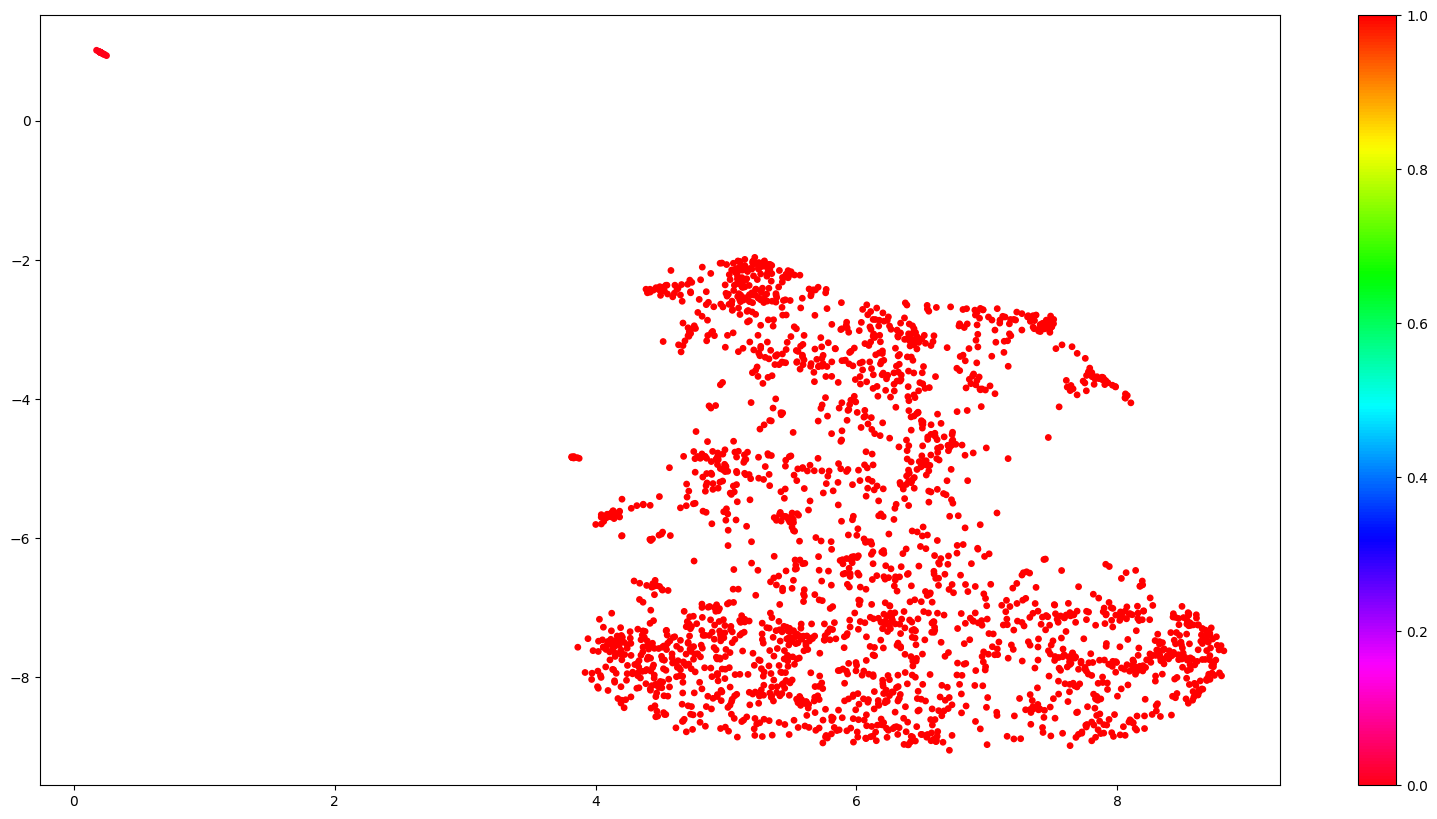

In [20]:
for use_data in ["Overview", "Description"]:
    # for pretrained_model in ['distilbert-base-nli-mean-tokens']:
    for pretrained_model in ['all-mpnet-base-v2', 'distilbert-base-nli-mean-tokens']:
        for umap_num in [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
            print(f"{use_data}_{pretrained_model}_{umap_num}")
            # clustering_sentence_bert(use_data, umap_num, pretrained_model)

            # is_using_gpu = spacy.prefer_gpu()
            # if is_using_gpu:
            #     torch.set_default_tensor_type("torch.cuda.FloatTensor")

            #Load bert model
            model_bert = spacy.load("en_trf_bertbaseuncased_lg")
            model_sentence_bert = SentenceTransformer(str(pretrained_model))
            if use_data == "Overview":
                embeddings_bert = model_bert(data_overview, show_progress_bar=True)
                embeddings_sentence_bert = model_sentence_bert.encode(data_overview, show_progress_bar=True)
            else:
                embeddings_bert = model_bert(data_description, show_progress_bar=True)
                embeddings_sentence_bert = model_sentence_bert.encode(data_description, show_progress_bar=True)
                
            # embeddings = model.encode(data_description, show_progress_bar=True)
            embeddings = embeddings_bert
            # embeddings = embeddings_sentence_bert

            nn = umap_num
            nc = 5
            umap_embeddings = umap.UMAP(n_neighbors=nn, 
                                        n_components=nc, 
                                        metric='cosine').fit_transform(embeddings)
            cluster = hdbscan.HDBSCAN(min_cluster_size=5,metric='euclidean',cluster_selection_method='eom').fit(umap_embeddings)


            # Prepare data
            umap_data = umap.UMAP(n_neighbors=nn, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
            result = pd.DataFrame(umap_data, columns=['x', 'y'])
            result['labels'] = cluster.labels_
            print(cluster.labels_)

            # Visualize clusters
            fig, ax = plt.subplots(figsize=(20, 10))
            outliers = result.loc[result.labels == -1, :]
            clustered = result.loc[result.labels != -1, :]
            size = 15.0
            plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=size)
            # plt.scatter(clustered.x, clustered.y, c= s=0.05, cmap='hsv_r')
            plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=size, cmap='hsv_r')
            plt.colorbar()


            buf, size = fig.canvas.print_to_buffer()
            img_arr = np.frombuffer(buf, dtype=np.uint8).reshape(size[1], size[0], -1)
            table = cv2.cvtColor(img_arr, cv2.COLOR_RGBA2BGR)
            img_dir = os.path.join(home_dir, f"data/cluster_imgs/{use_data}/{pretrained_model}")
            os.makedirs(img_dir, exist_ok=True)
            img_path = os.path.join(img_dir, f"umap_nn{nn}_nc{nc}_15.png")
            # if os.path.exists(img_path):
            #     pass
            # else:
            cv2.imwrite(img_path, table)
            
            # # 次元削減する
            # mapper = manifold.TSNE(random_state=0)
            # embedding = mapper.fit_transform(X)

            # # 結果を二次元でプロットする
            # embedding_x = embedding[:, 0]
            # embedding_y = embedding[:, 1]
            # for n in np.unique(y):
            #     plt.scatter(embedding_x[y == n],
            #                 embedding_y[y == n],
            #                 label=n)

            # # グラフを表示する
            # plt.grid()
            # plt.legend()
            # plt.show()

            # def make_table(self, fig, x_list, y_dic, frame_num):
            #     ax = fig.add_subplot(1, 1, 1)
            #     for clr in self.use_color:
            #         ax.plot(x_list, y_dic[clr], color=self.plot_color_dic[clr], label=clr)
            #         ax.scatter(frame_num, y_dic[clr][-1], c=self.plot_color_dic[clr])
            #     ax.legend(loc=0)
            #     buf, size = fig.canvas.print_to_buffer()
            #     # print('size is : ',size)
            #     img_arr = np.frombuffer(buf, dtype=np.uint8).reshape(size[1], size[0], -1)
            #     table = cv2.cvtColor(img_arr, cv2.COLOR_RGBA2BGR)
            #     return table